# Task 1: Data Preparation & Exploratory Analysis 
## Part A: Data Loading & Initial Exploration 

### 1. Load and examine the dataset

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load the dataset
df = pd.read_csv("customer_data.csv")

# 2. Basic info
print("Shape of dataset:", df.shape)
print("=="*40)
print("\nColumns:")
print(df.columns)
print("=="*40)

print("\nData types:")
print(df.dtypes)
print("=="*40)

print("\nDataset info:")
df.info()
print("=="*40)

# 3. Statistical summary
print("\nStatistical summary:")
print(df.describe(include="all"))
print("=="*40)

# 4. Missing values
print("\nMissing values per column:")
print(df.isnull().sum())
print("=="*40)

print("\nTotal missing values:", df.isnull().sum().sum())
print("=="*40)
# 5. Class distribution (for classification)
# Replace 'Churn' with your actual target column name
if "Churn" in df.columns:
    print("\nClass distribution:")
    print(df["Churn"].value_counts())
    print("\nClass distribution (percentage):")
    print(df["Churn"].value_counts(normalize=True) * 100)


Shape of dataset: (1000, 31)

Columns:
Index(['Customer_ID', 'Age', 'Gender', 'Annual_Income', 'Education',
       'Location_Type', 'Account_Age_Days', 'Membership_Type',
       'Payment_Method', 'Total_Purchases', 'Total_Amount_Spent',
       'Avg_Order_Value', 'Days_Since_Last_Purchase', 'Purchase_Frequency',
       'Visits_Per_Month', 'Time_Per_Visit_Minutes', 'Product_Views_Per_Visit',
       'Cart_Abandonment_Rate', 'Email_Open_Rate', 'Customer_Service_Contacts',
       'Satisfaction_Score', 'NPS', 'Referrals', 'Loyalty_Points',
       'Complaints', 'Favorite_Category', 'Num_Categories_Shopped',
       'Discount_Usage_Rate', 'Returns_Rate', 'Churn_Risk_Score', 'Churned'],
      dtype='object')

Data types:
Customer_ID                   object
Age                            int64
Gender                        object
Annual_Income                  int64
Education                     object
Location_Type                 object
Account_Age_Days               int64
Membership_Type     

### 2. Target variable analysis

In [36]:
# Display churn distribution
print("Churn distribution (counts):")
print(df["Churned"].value_counts())

print("\nChurn distribution (percentages):")
print(df["Churned"].value_counts(normalize=True) * 100)


# Remove target column before clustering
df_clustering = df.drop(columns=["Churned"])

print("Shape after removing Churned column:", df_clustering.shape)


Churn distribution (counts):
Churned
1    521
0    479
Name: count, dtype: int64

Churn distribution (percentages):
Churned
1    52.1
0    47.9
Name: proportion, dtype: float64
Shape after removing Churned column: (1000, 30)


## Part B: Exploratory Data Analysis 
### 1. Distribution Analysis

Index(['Age', 'Annual_Income', 'Account_Age_Days', 'Total_Purchases',
       'Total_Amount_Spent', 'Avg_Order_Value', 'Days_Since_Last_Purchase',
       'Purchase_Frequency', 'Visits_Per_Month', 'Time_Per_Visit_Minutes',
       'Product_Views_Per_Visit', 'Cart_Abandonment_Rate', 'Email_Open_Rate',
       'Customer_Service_Contacts', 'Satisfaction_Score', 'NPS', 'Referrals',
       'Loyalty_Points', 'Complaints', 'Num_Categories_Shopped',
       'Discount_Usage_Rate', 'Returns_Rate', 'Churn_Risk_Score', 'Churned'],
      dtype='object')


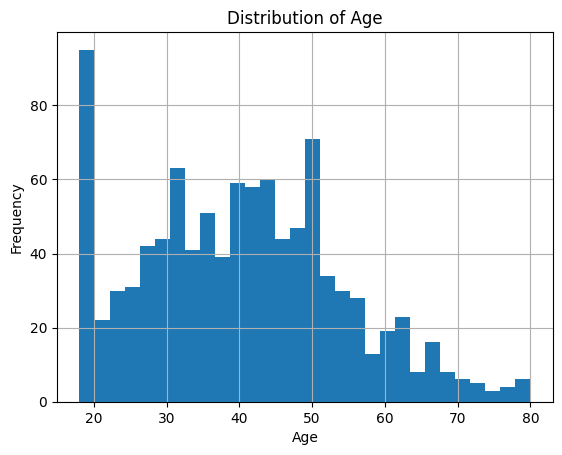

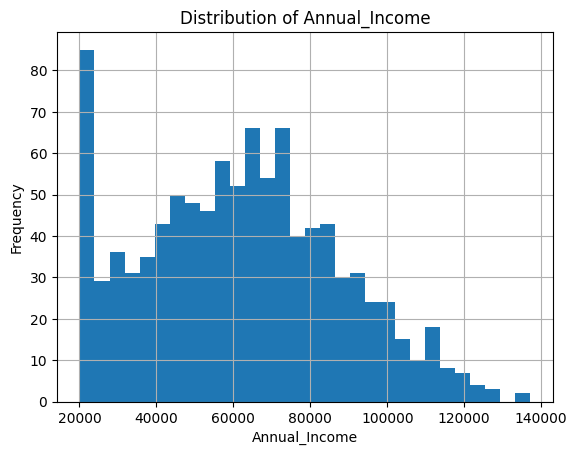

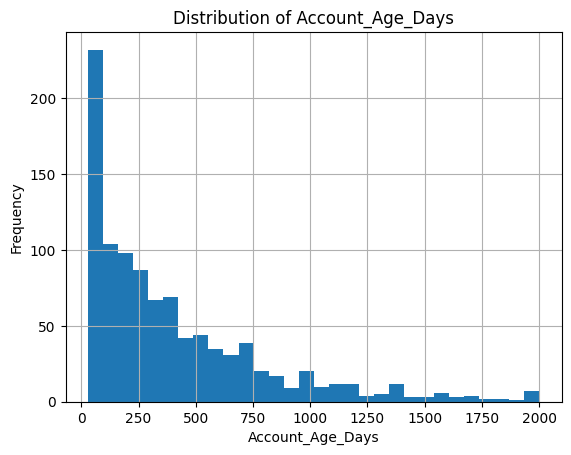

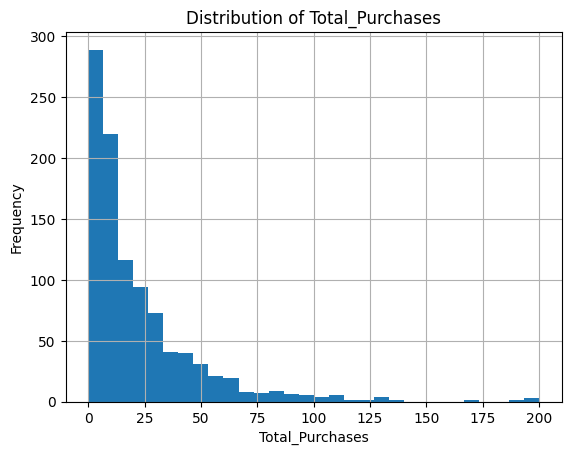

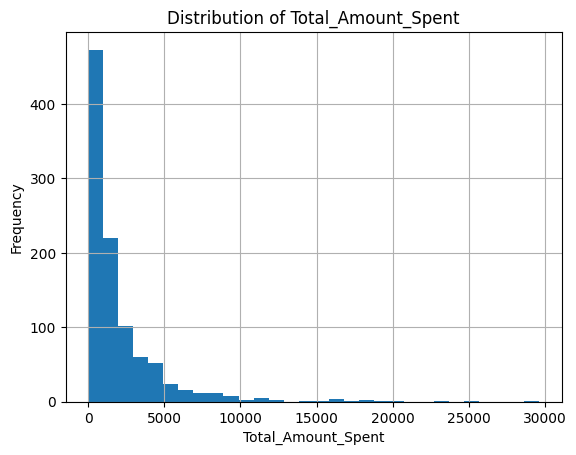

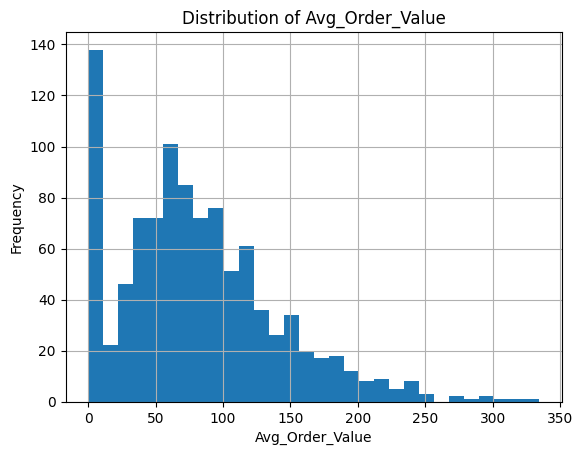

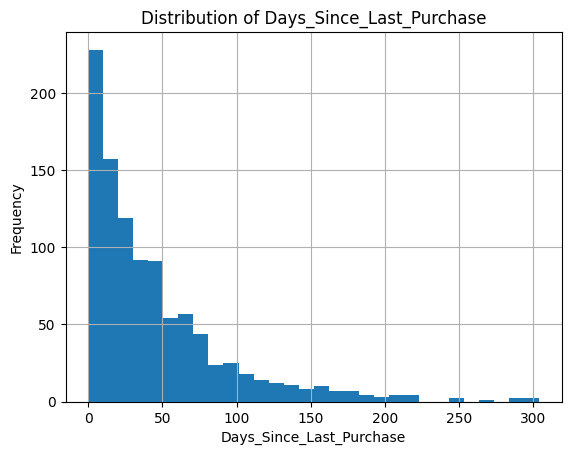

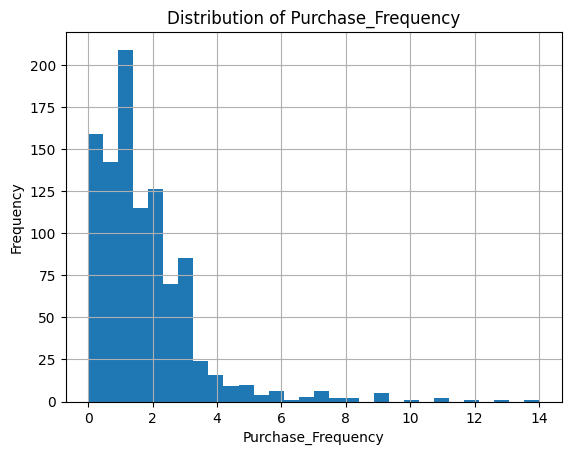

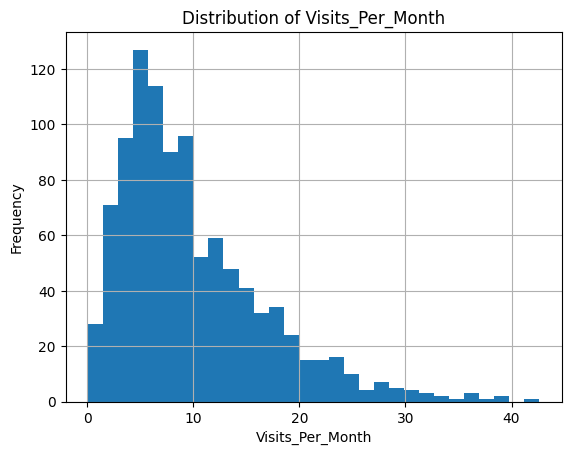

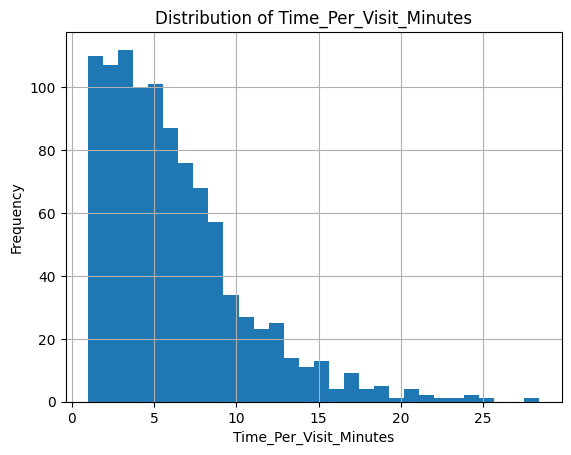

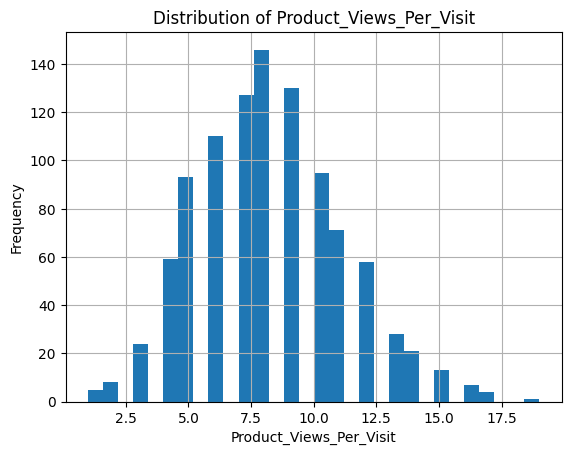

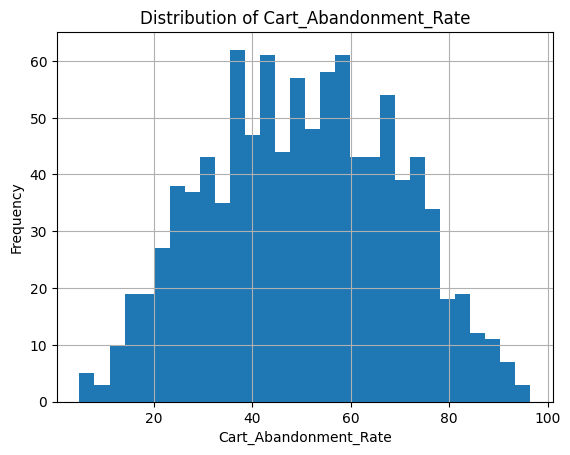

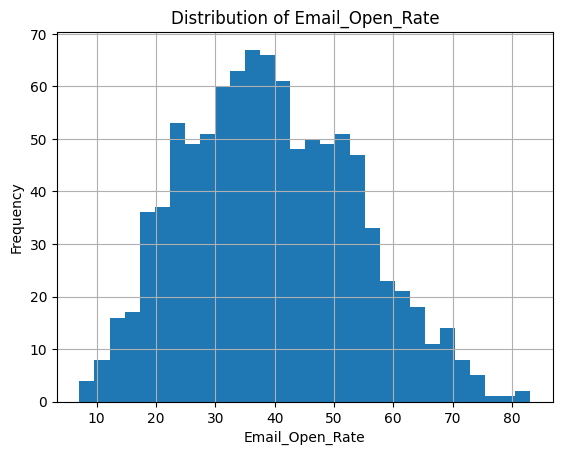

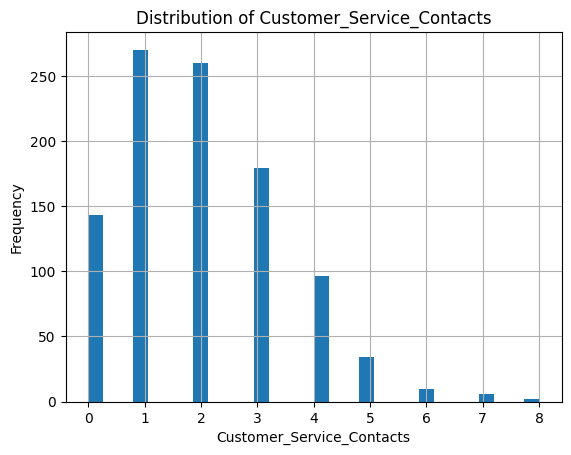

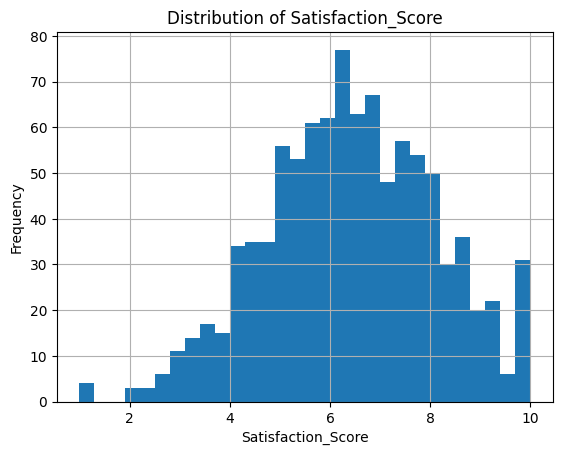

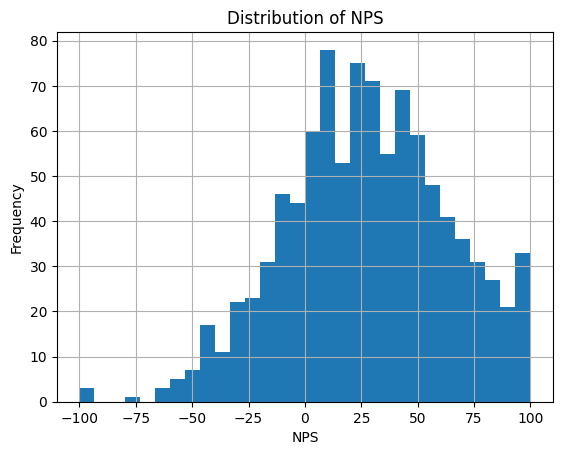

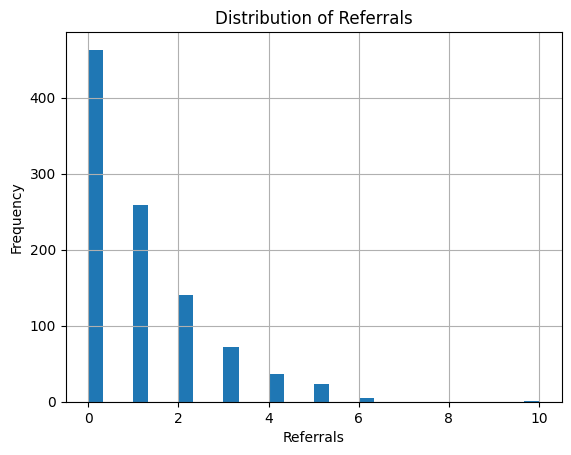

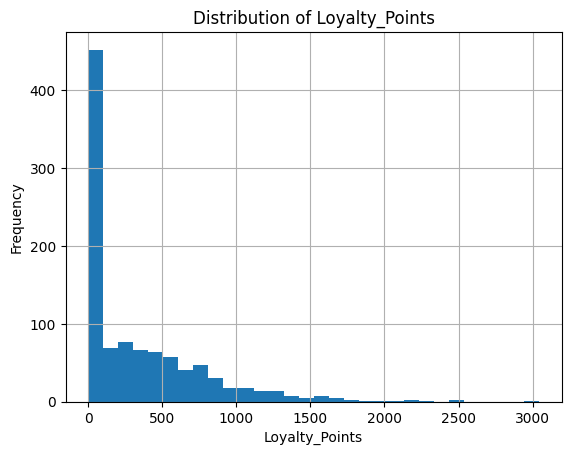

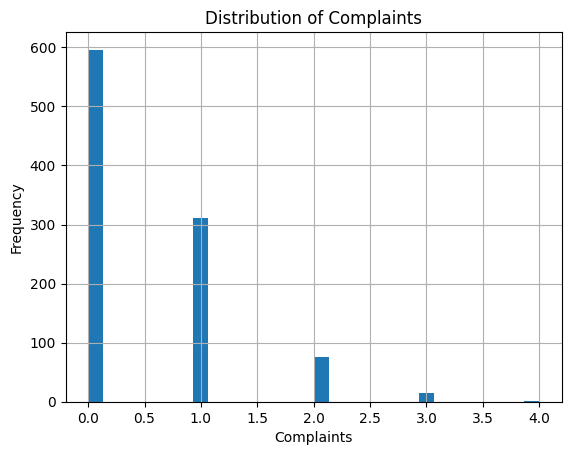

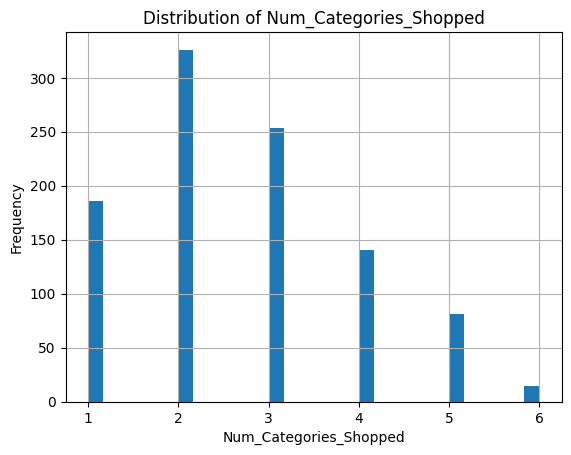

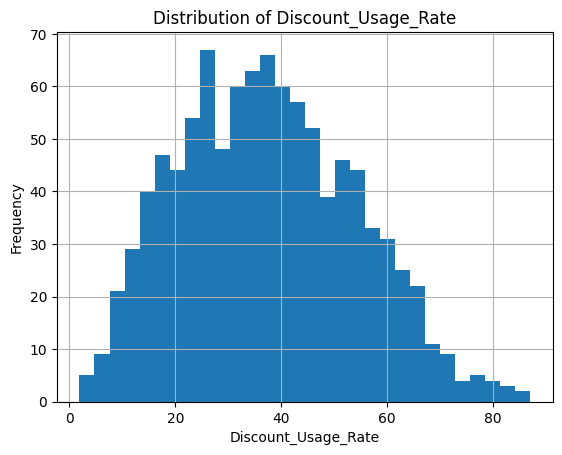

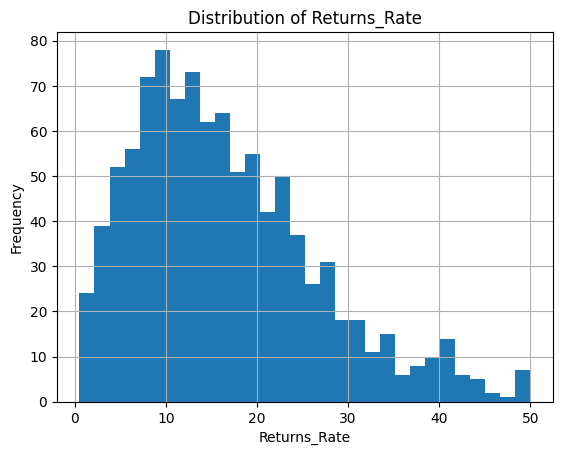

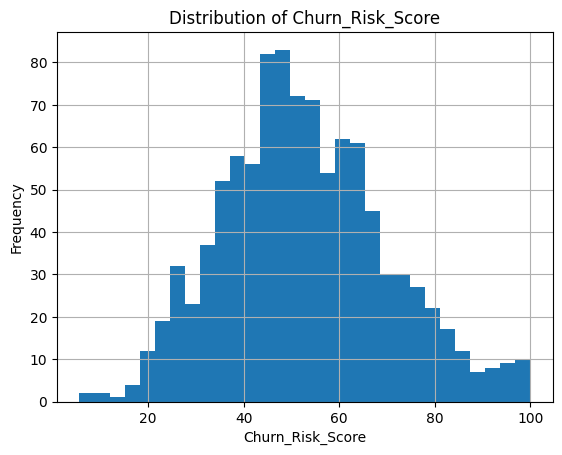

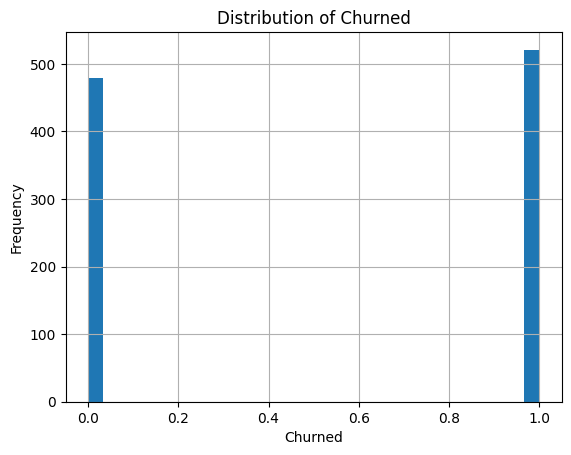

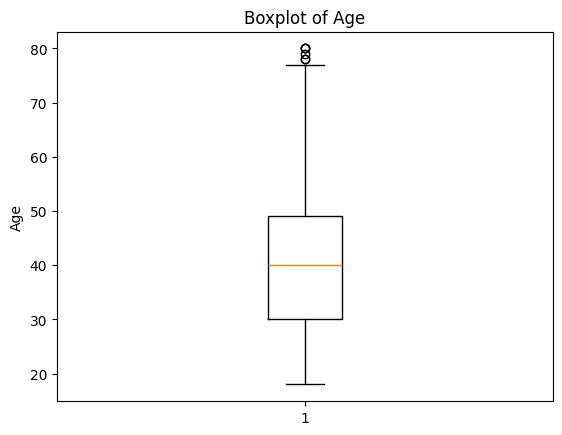

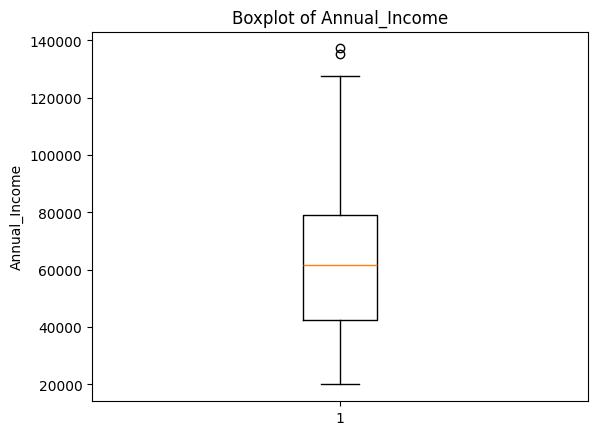

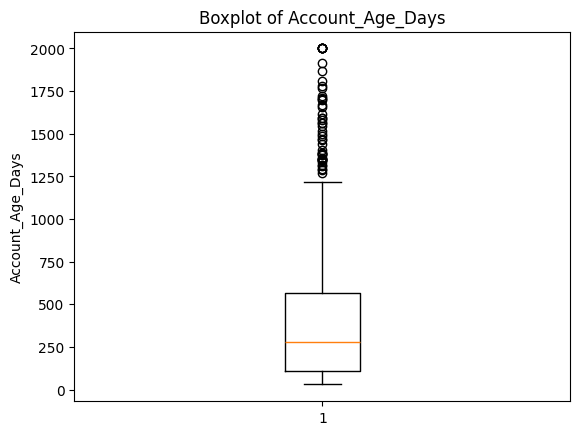

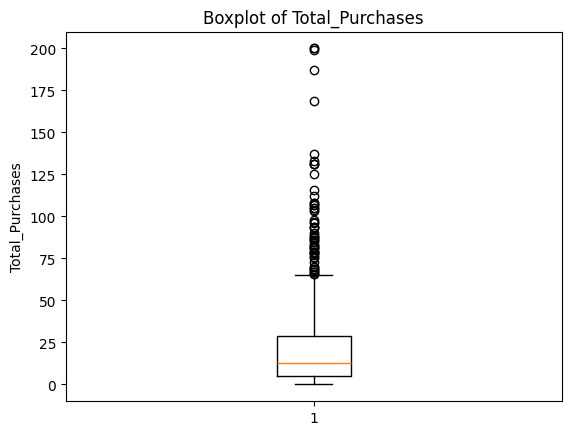

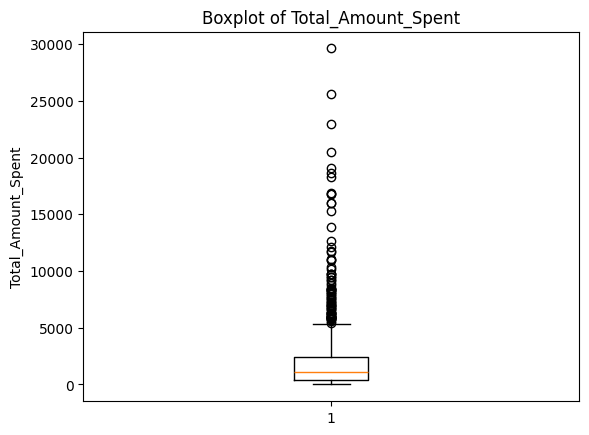

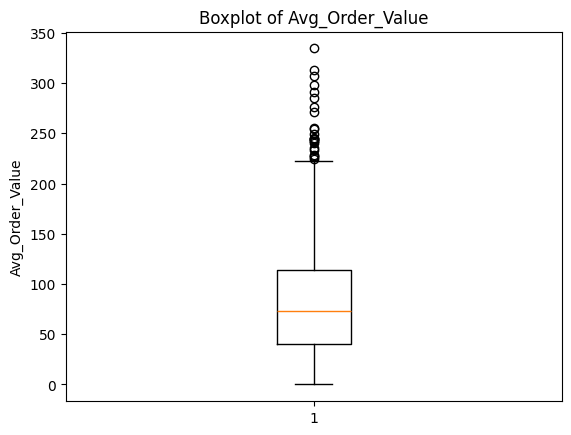

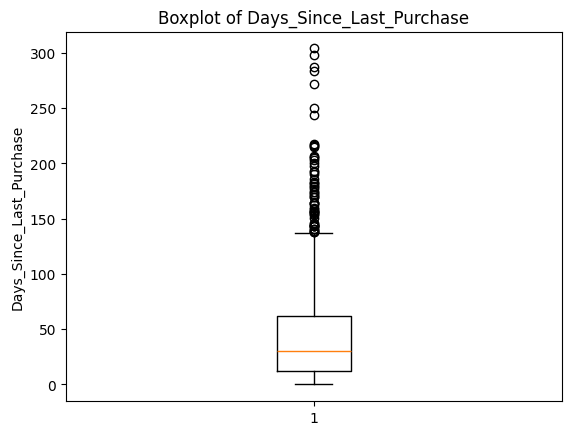

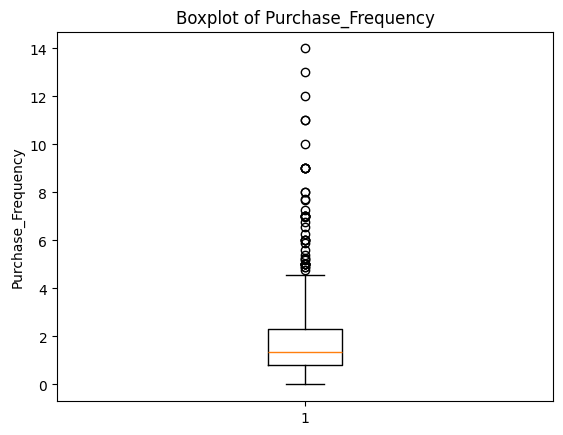

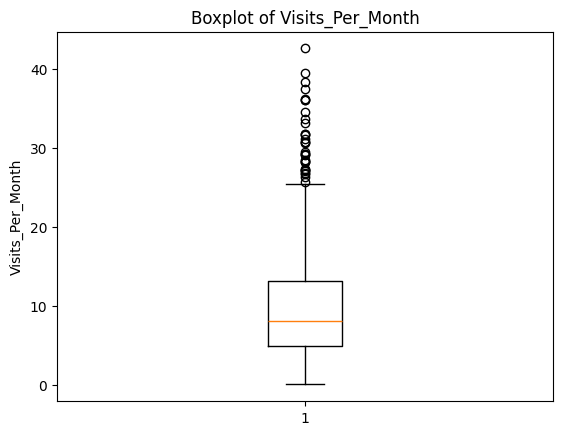

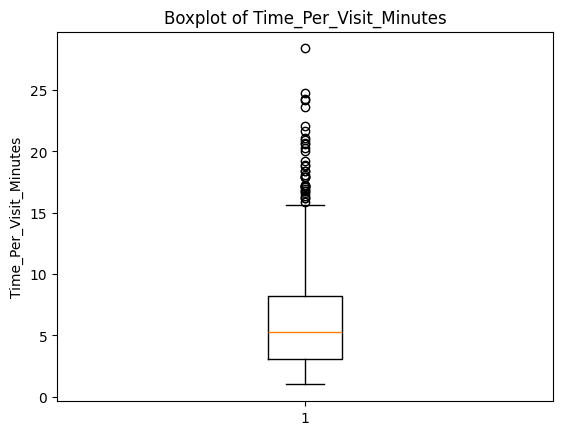

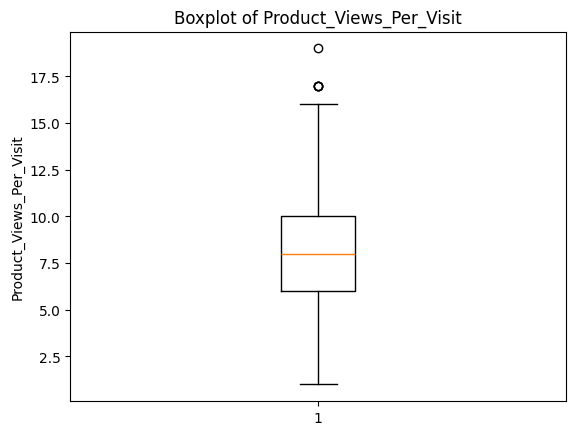

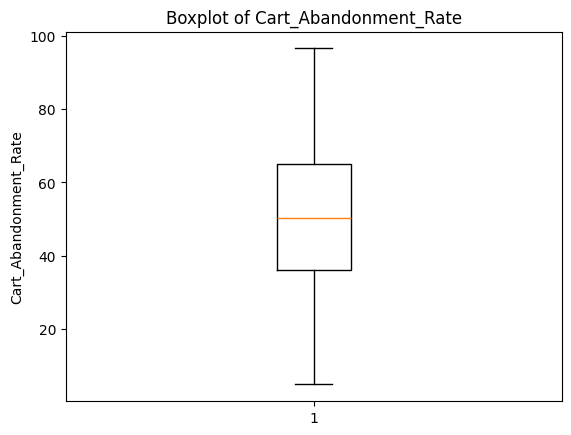

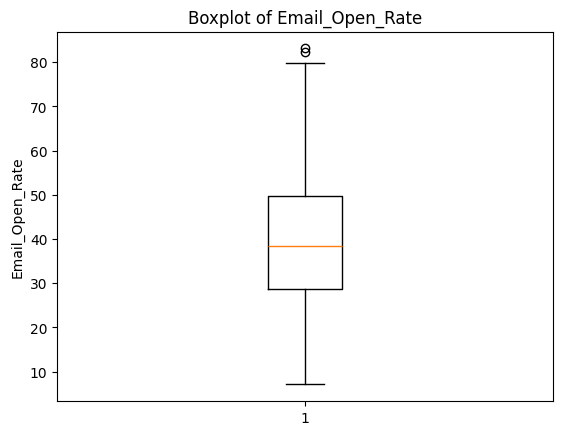

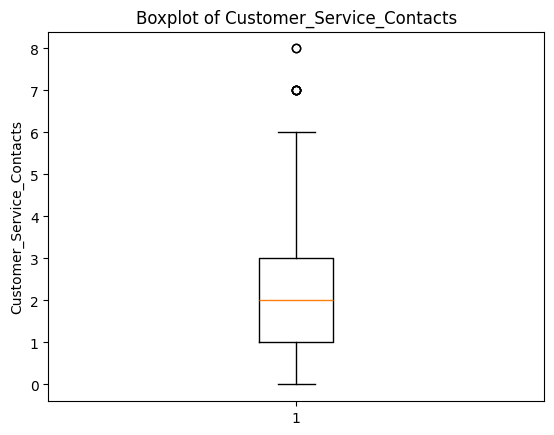

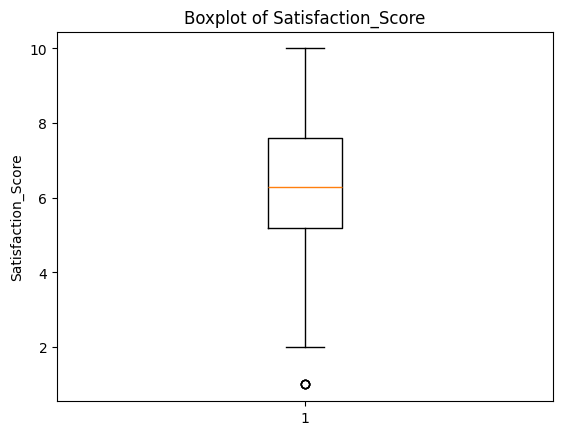

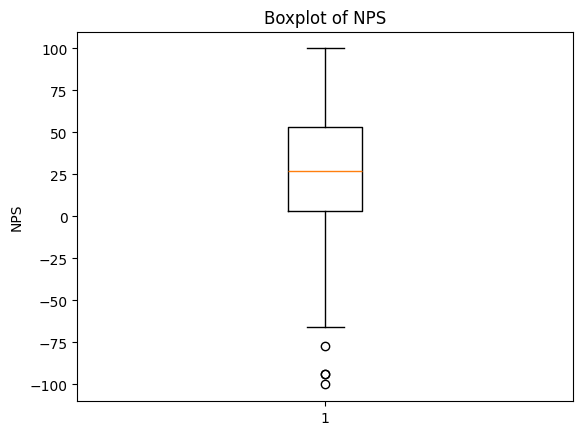

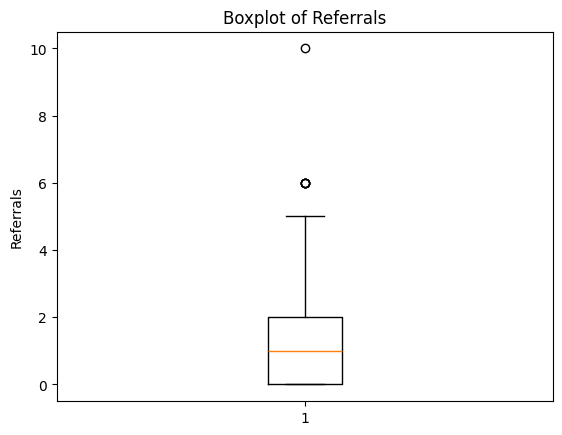

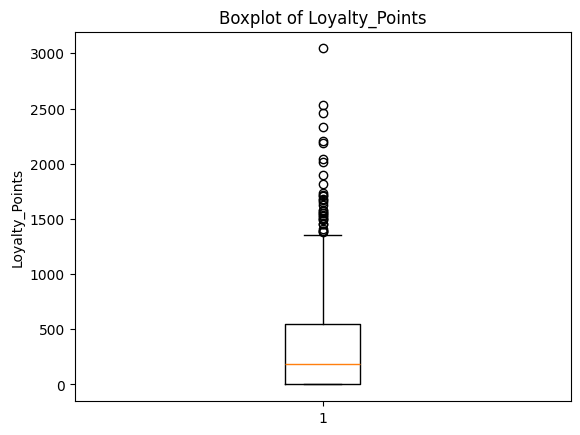

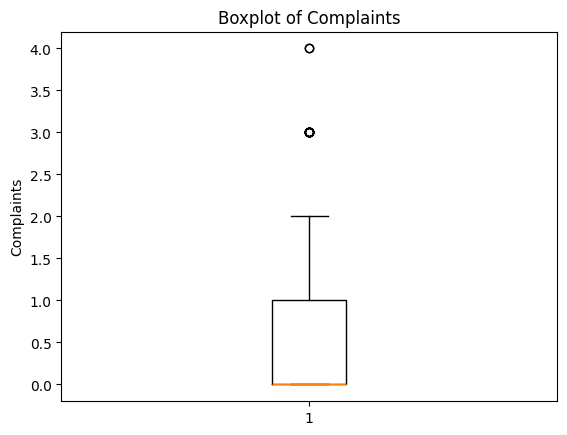

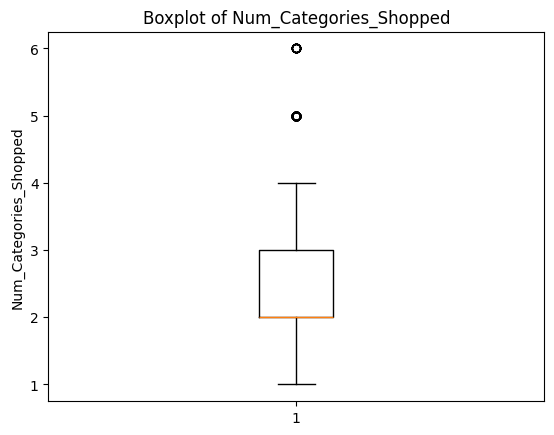

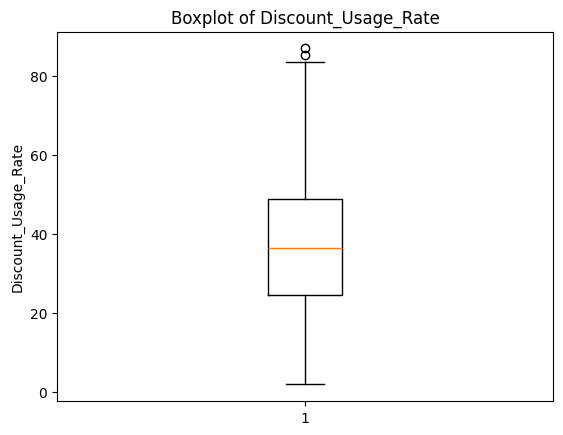

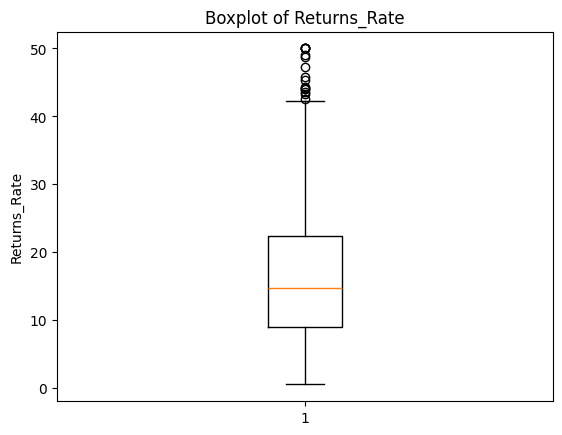

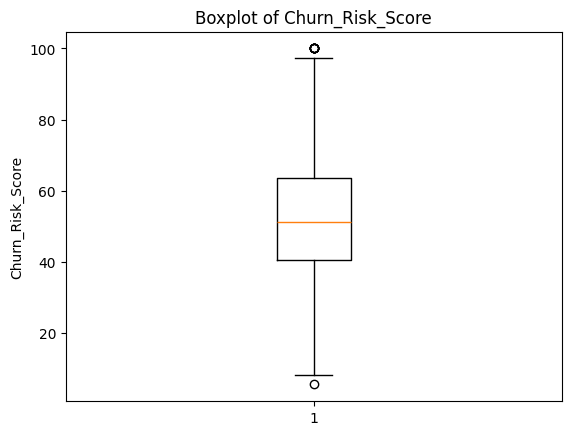

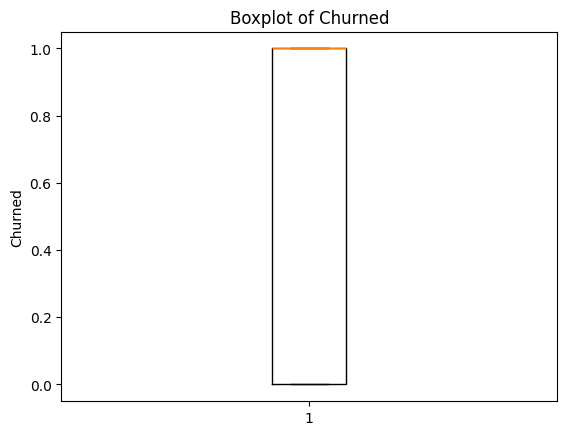

Skewness of numerical features:
Age                          0.327653
Annual_Income                0.219350
Account_Age_Days             1.622775
Total_Purchases              2.679605
Total_Amount_Spent           3.831325
Avg_Order_Value              0.847658
Days_Since_Last_Purchase     1.988253
Purchase_Frequency           2.623991
Visits_Per_Month             1.338371
Time_Per_Visit_Minutes       1.413572
Product_Views_Per_Visit      0.363149
Cart_Abandonment_Rate        0.006257
Email_Open_Rate              0.258846
Customer_Service_Contacts    0.753869
Satisfaction_Score          -0.117715
NPS                         -0.136145
Referrals                    1.568609
Loyalty_Points               1.782174
Complaints                   1.395895
Num_Categories_Shopped       0.540573
Discount_Usage_Rate          0.277891
Returns_Rate                 0.870281
Churn_Risk_Score             0.319471
Churned                     -0.084201
dtype: float64


In [37]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print(num_cols)


for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


for col in num_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


print("Skewness of numerical features:")
print(df[num_cols].skew())


### 2. Relationship Analysis

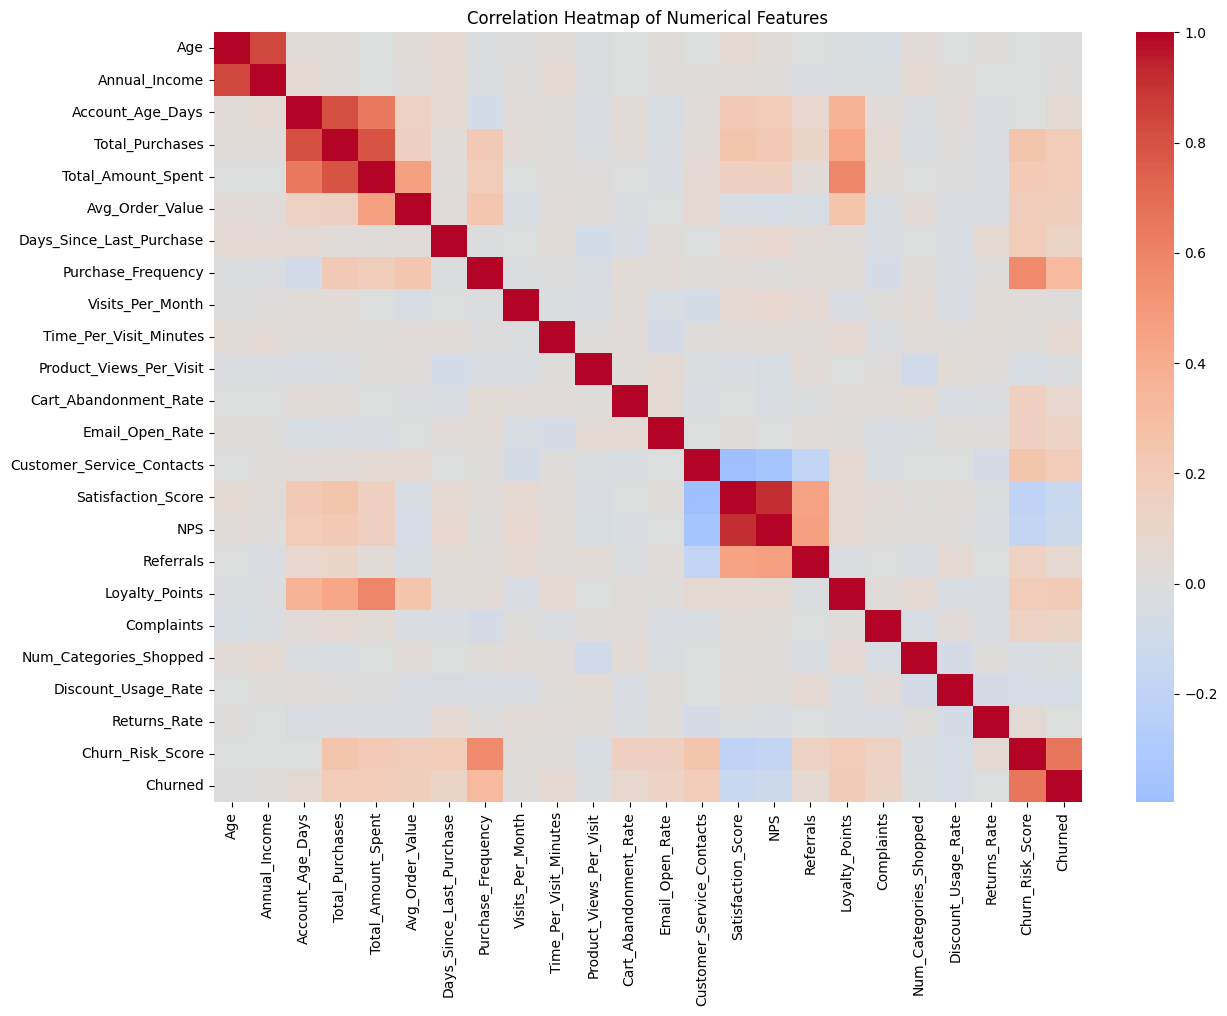

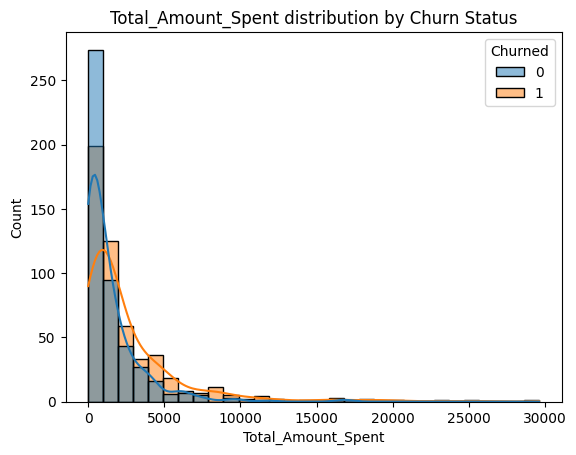

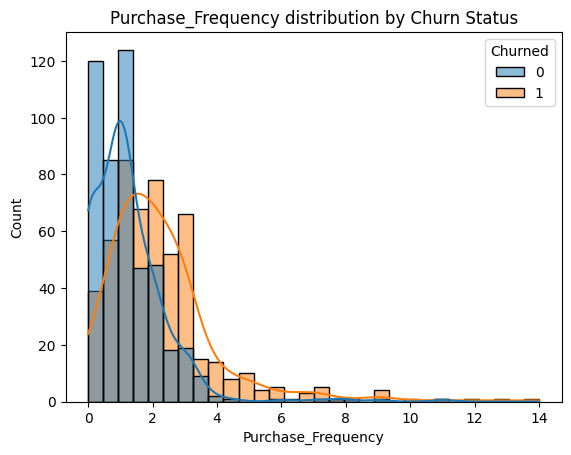

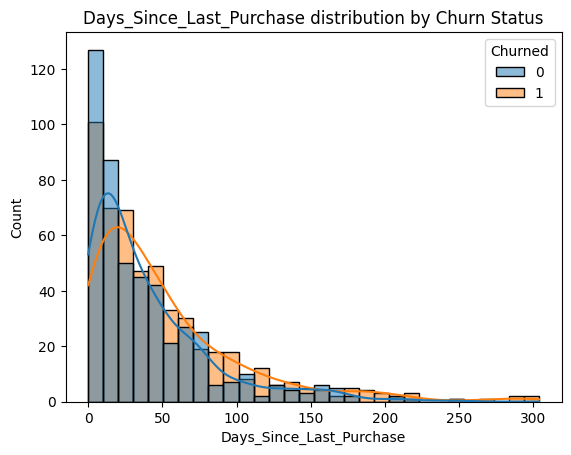

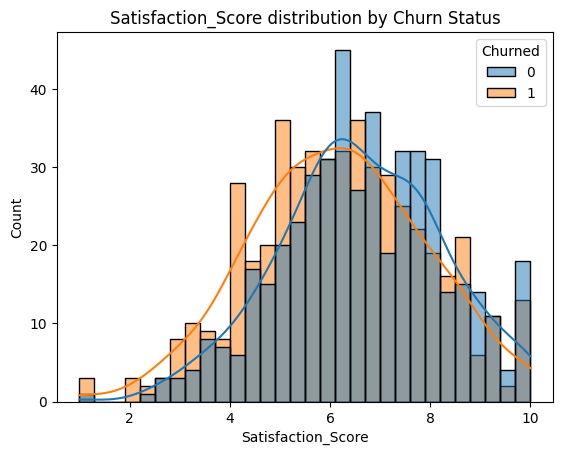

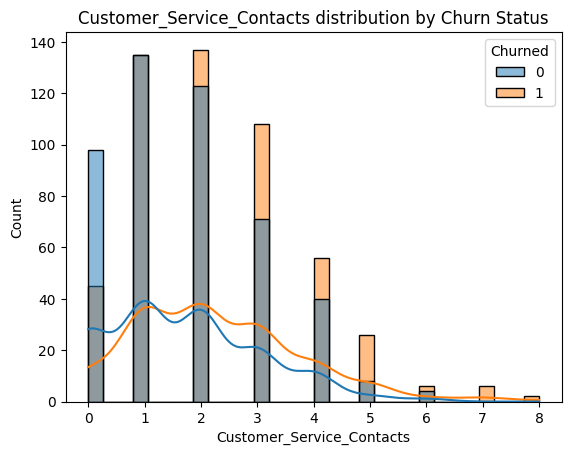

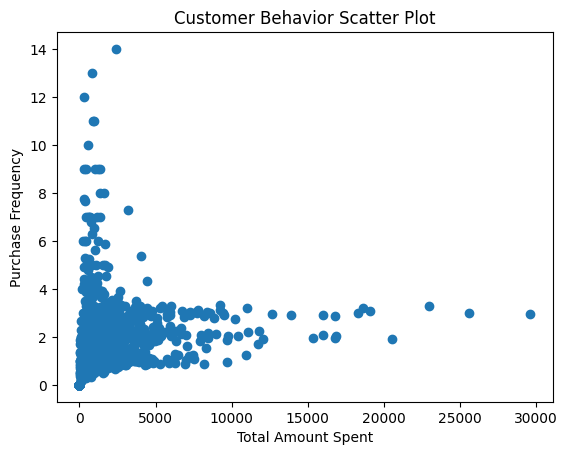

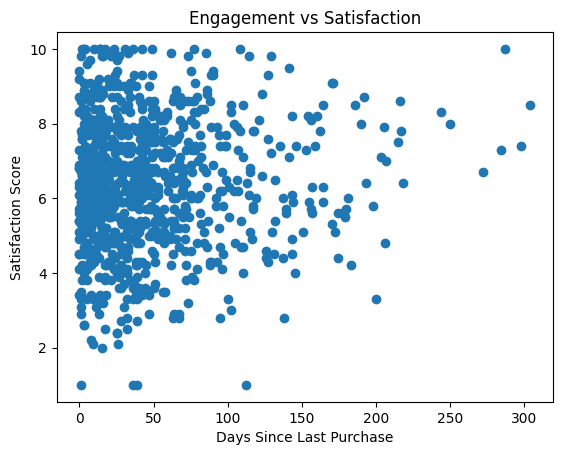

Top 5 features correlated with churn:
Churn_Risk_Score             0.657931
Purchase_Frequency           0.314264
Loyalty_Points               0.198843
Total_Amount_Spent           0.194624
Customer_Service_Contacts    0.193049
Name: Churned, dtype: float64
Top 5 features with highest variation:
Annual_Income         25633.320560
Total_Amount_Spent     2959.578868
Loyalty_Points          432.948028
Account_Age_Days        395.505980
Avg_Order_Value          59.348617
dtype: float64


In [38]:
# Select numerical features
num_df = df.select_dtypes(include=["int64", "float64"])

# Correlation matrix
corr = num_df.corr()

# Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


# feature comparison
features = [
    "Total_Amount_Spent",
    "Purchase_Frequency",
    "Days_Since_Last_Purchase",
    "Satisfaction_Score",
    "Customer_Service_Contacts"
]

for col in features:
    plt.figure()
    sns.histplot(df, x=col, hue="Churned", bins=30, kde=True)
    plt.title(f"{col} distribution by Churn Status")
    plt.show()
    
# for clustering
plt.figure()
plt.scatter(df["Total_Amount_Spent"], df["Purchase_Frequency"])
plt.xlabel("Total Amount Spent")
plt.ylabel("Purchase Frequency")
plt.title("Customer Behavior Scatter Plot")
plt.show()

plt.figure()
plt.scatter(df["Days_Since_Last_Purchase"], df["Satisfaction_Score"])
plt.xlabel("Days Since Last Purchase")
plt.ylabel("Satisfaction Score")
plt.title("Engagement vs Satisfaction")
plt.show()


# Correlation with churn
churn_corr = corr["Churned"].abs().sort_values(ascending=False)

top_5_churn = churn_corr[1:6]  # skip Churned itself
print("Top 5 features correlated with churn:")
print(top_5_churn)
print("=="*40)

# Clustering: features with high variation
variation = num_df.std().sort_values(ascending=False)

top_5_variation = variation.head(5)
print("Top 5 features with highest variation:")
print(top_5_variation)



### 3. Categorical Analysis

Membership_Type
Basic      528
Premium    321
VIP        151
Name: count, dtype: int64


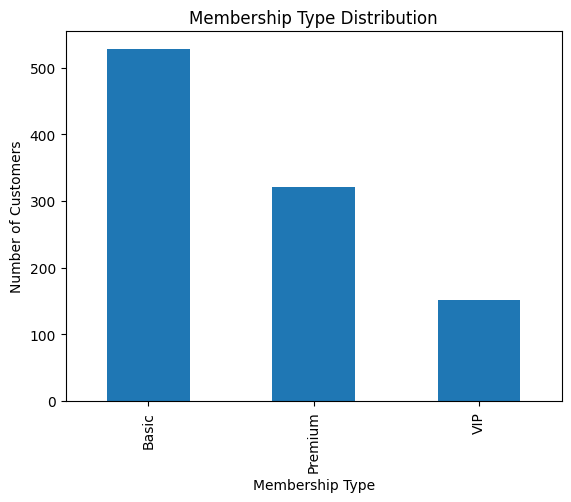

                 Total_Amount_Spent  Purchase_Frequency  Avg_Order_Value  \
Membership_Type                                                            
Basic                   1259.019886            1.223769        77.344053   
Premium                 2251.424174            1.973178        85.129657   
VIP                     4051.299669            3.063311        86.527616   

                 Days_Since_Last_Purchase  
Membership_Type                            
Basic                           46.047348  
Premium                         44.426791  
VIP                             43.602649  


<Figure size 640x480 with 0 Axes>

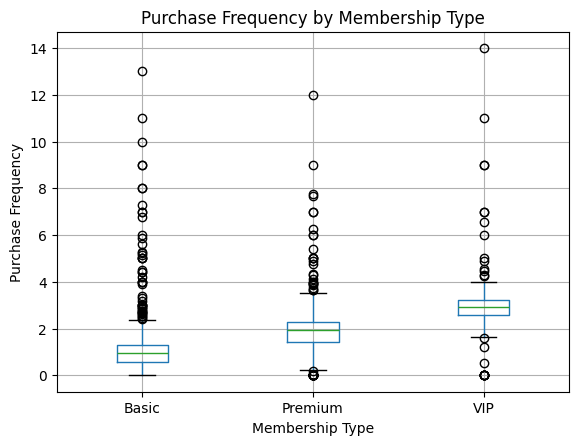

<Figure size 640x480 with 0 Axes>

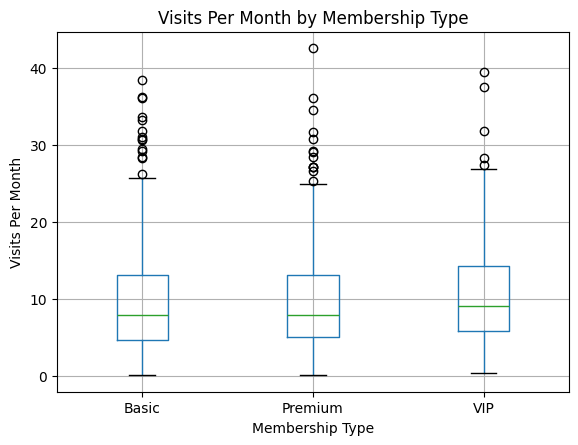

In [39]:
# Count membership types
print(df["Membership_Type"].value_counts())

# Visualize distribution
plt.figure()
df["Membership_Type"].value_counts().plot(kind="bar")
plt.title("Membership Type Distribution")
plt.xlabel("Membership Type")
plt.ylabel("Number of Customers")
plt.show()


behavior_metrics = [
    "Total_Amount_Spent",
    "Purchase_Frequency",
    "Avg_Order_Value",
    "Days_Since_Last_Purchase"
]

segment_behavior = df.groupby("Membership_Type")[behavior_metrics].mean()
print(segment_behavior)


# Purchase frequency by membership type
plt.figure()
df.boxplot(column="Purchase_Frequency", by="Membership_Type")
plt.title("Purchase Frequency by Membership Type")
plt.suptitle("")
plt.xlabel("Membership Type")
plt.ylabel("Purchase Frequency")
plt.show()

# Website engagement

plt.figure()
df.boxplot(column="Visits_Per_Month", by="Membership_Type")
plt.title("Visits Per Month by Membership Type")
plt.suptitle("")
plt.xlabel("Membership Type")
plt.ylabel("Visits Per Month")
plt.show()



### 4. Key Insights

- Customers who churn show longer Days_Since_Last_Purchase, lower Purchase_Frequency, and lower Satisfaction_Score.
- Total_Amount_Spent and Purchase_Frequency are strongly correlated — clear high‑value vs low‑value customer groups.
- Membership_Type segments differ: premium members have higher Avg_Order_Value, Purchase_Frequency, and Visits_Per_Month.
- Higher Customer_Service_Contacts and low satisfaction align with increased churn risk.

Hypotheses (drivers)
- Churn is driven by reduced engagement/recency (fewer visits, longer time since last purchase) and low satisfaction.
- Frequent support interactions indicate unresolved issues that increase churn probability.
- Membership benefits and higher spending/frequency create stable retained segments; promotional or re‑engagement efforts could reduce churn.

## Part C: Data Preprocessing
### 1. Handle Missing Values

In [40]:
# Select numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Fill missing values with median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Check remaining missing values
print(df[num_cols].isnull().sum())

Age                          0
Annual_Income                0
Account_Age_Days             0
Total_Purchases              0
Total_Amount_Spent           0
Avg_Order_Value              0
Days_Since_Last_Purchase     0
Purchase_Frequency           0
Visits_Per_Month             0
Time_Per_Visit_Minutes       0
Product_Views_Per_Visit      0
Cart_Abandonment_Rate        0
Email_Open_Rate              0
Customer_Service_Contacts    0
Satisfaction_Score           0
NPS                          0
Referrals                    0
Loyalty_Points               0
Complaints                   0
Num_Categories_Shopped       0
Discount_Usage_Rate          0
Returns_Rate                 0
Churn_Risk_Score             0
Churned                      0
dtype: int64


### 2. Feature Selection

In [41]:
# Columns to always remove
cols_to_drop = ["Customer_ID", "Churn_Risk_Score"]

# Drop ID and leakage column
df = df.drop(columns=cols_to_drop)

# For clustering only: also remove target label
df_clustering = df.drop(columns=["Churned"])

print("Remaining columns (classification):")
print(df.columns)
print("=="*40)
print("\nRemaining columns (clustering):")
print(df_clustering.columns)

Remaining columns (classification):
Index(['Age', 'Gender', 'Annual_Income', 'Education', 'Location_Type',
       'Account_Age_Days', 'Membership_Type', 'Payment_Method',
       'Total_Purchases', 'Total_Amount_Spent', 'Avg_Order_Value',
       'Days_Since_Last_Purchase', 'Purchase_Frequency', 'Visits_Per_Month',
       'Time_Per_Visit_Minutes', 'Product_Views_Per_Visit',
       'Cart_Abandonment_Rate', 'Email_Open_Rate', 'Customer_Service_Contacts',
       'Satisfaction_Score', 'NPS', 'Referrals', 'Loyalty_Points',
       'Complaints', 'Favorite_Category', 'Num_Categories_Shopped',
       'Discount_Usage_Rate', 'Returns_Rate', 'Churned'],
      dtype='object')

Remaining columns (clustering):
Index(['Age', 'Gender', 'Annual_Income', 'Education', 'Location_Type',
       'Account_Age_Days', 'Membership_Type', 'Payment_Method',
       'Total_Purchases', 'Total_Amount_Spent', 'Avg_Order_Value',
       'Days_Since_Last_Purchase', 'Purchase_Frequency', 'Visits_Per_Month',
       'Time_Per_V

### 3. Encode Categorical Variables

In [42]:
from sklearn.preprocessing import OneHotEncoder


# Select object or category type columns
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()


encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded = encoder.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(categorical_cols)
)

# Combine with numerical features
df_final = pd.concat(
    [
        df.drop(columns=categorical_cols).reset_index(drop=True),
        encoded_df.reset_index(drop=True)
    ],
    axis=1
)

print("Shape after encoding:", df_final.shape)


Shape after encoding: (1000, 40)


### 4. Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Identify numerical features 
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churned' in num_cols:
    num_cols.remove('Churned')

# For Clustering: Fit on entire dataset
# We create a copy to keep the Clustering data separate
df_clustering = df.copy()

scaler_cluster = StandardScaler()
df_clustering[num_cols] = scaler_cluster.fit_transform(df_clustering[num_cols])


# For Classification: Fit on train set only
# Define Features (X) and Target (y)
X = df.drop(columns=['Churned'])
y = df['Churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a new Scaler for classification
scaler_class = StandardScaler()

# Fit on TRAIN set only, then transform TRAIN and TEST
X_train[num_cols] = scaler_class.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler_class.transform(X_test[num_cols])

### 5. Train-Test Split (Classification only):

In [44]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
# Assuming 'Churned' is the target column based on previous steps
X = df.drop(columns=['Churned'])
y = df['Churned']

# 5. Train-Test Split (Classification only)
# Split 80/20 with stratification on target
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (800, 28)
Test set shape: (200, 28)


# Task 2: Model Implementation
## SECTION A: Classification Approach
### Part A1: Baseline Classification Models
#### 1. Logistic Regression:

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# 1. Identify categorical columns (strings)
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# 2. Convert categories to numbers (One-Hot Encoding)
# This creates new columns for each category and drops the original text columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# 3. Define Features and Target
X = df_encoded.drop(columns=['Churned'])
y = df_encoded['Churned']

# 4. Train-Test Split (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Re-apply Scaling to the encoded data
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churned' in num_cols: num_cols.remove('Churned')

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 6. Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# 7. Evaluate
y_pred = log_reg.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[65 31]
 [29 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68        96
           1       0.71      0.72      0.71       104

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200



#### 2. Decision Tree Classifier

Decision Tree trained with max_depth=5.


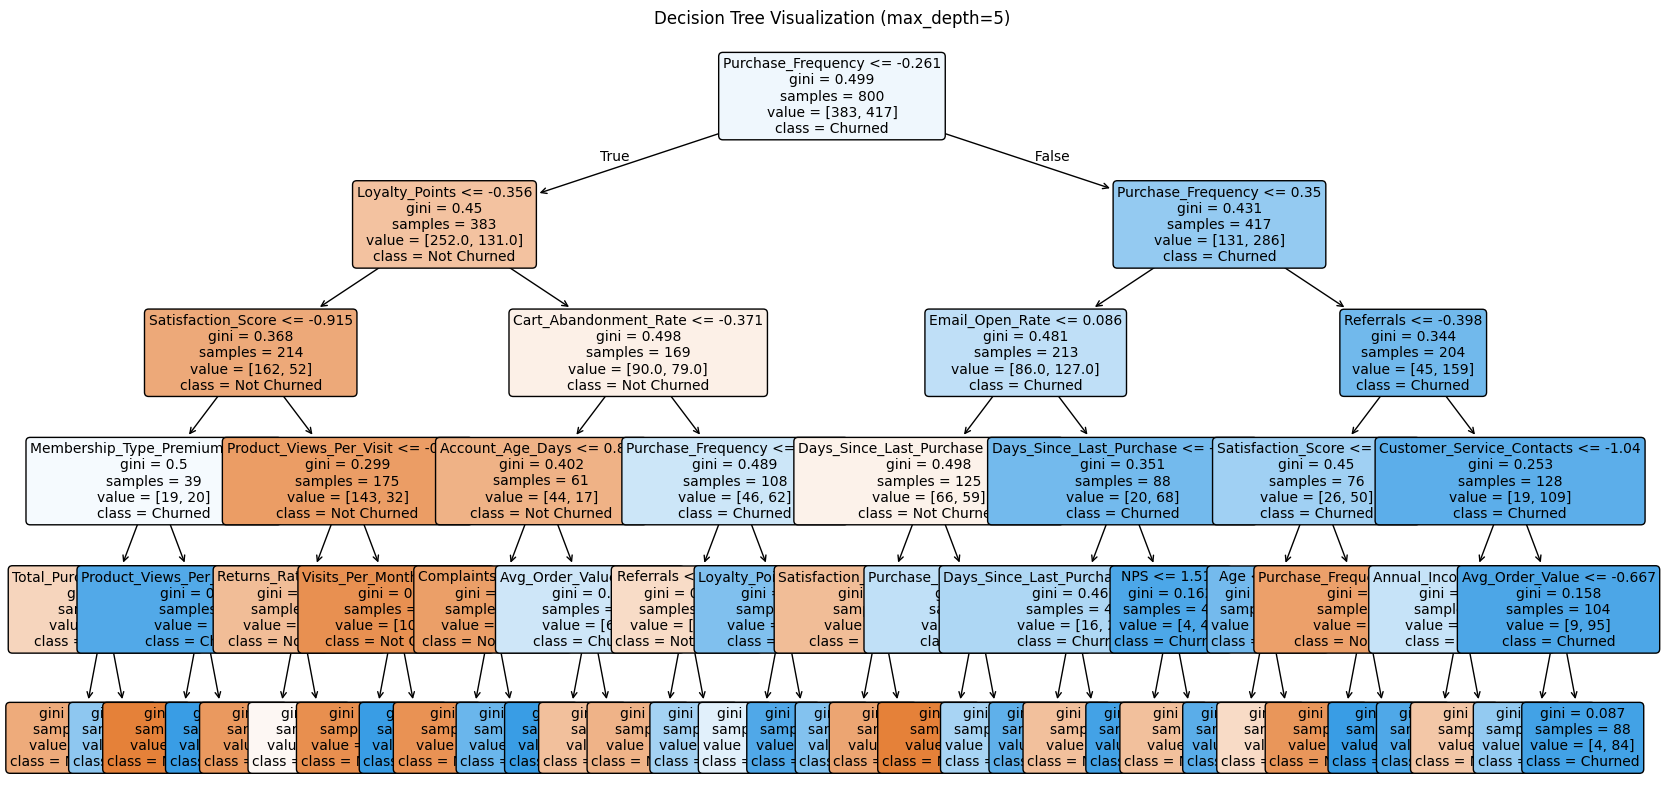


Top Feature Importances:
                      Feature  Importance
7          Purchase_Frequency    0.369270
14         Satisfaction_Score    0.109904
6    Days_Since_Last_Purchase    0.076914
17             Loyalty_Points    0.073057
12            Email_Open_Rate    0.053217
16                  Referrals    0.039625
11      Cart_Abandonment_Rate    0.038756
10    Product_Views_Per_Visit    0.031488
5             Avg_Order_Value    0.027279
13  Customer_Service_Contacts    0.024216


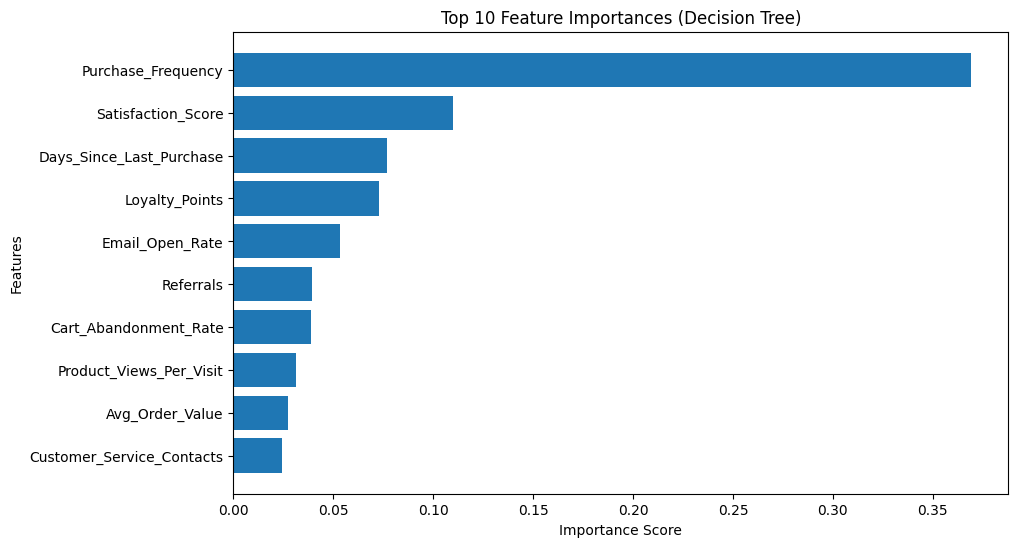

In [48]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialize the Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model on the training set
dt_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree trained with max_depth=5.")


plt.figure(figsize=(20, 10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['Not Churned', 'Churned'], 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization (max_depth=5)")
plt.show()

# Create a DataFrame for better visualization of importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:")
print(importance_df.head(10))

# Optional: Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances (Decision Tree)')
plt.gca().invert_yaxis()
plt.show()

#### 3. Random Forest Classifier

Top 10 Random Forest Feature Importances:
                     Feature  Importance
7         Purchase_Frequency    0.100318
17            Loyalty_Points    0.052216
6   Days_Since_Last_Purchase    0.050300
11     Cart_Abandonment_Rate    0.046356
5            Avg_Order_Value    0.046108
4         Total_Amount_Spent    0.044928
12           Email_Open_Rate    0.044513
14        Satisfaction_Score    0.043561
15                       NPS    0.043194
1              Annual_Income    0.040872

--- Model Comparison ---
Single Decision Tree Accuracy: 0.6150
Random Forest Accuracy:        0.6650

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        96
           1       0.68      0.66      0.67       104

    accuracy                           0.67       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.67      0.67      0.67       200



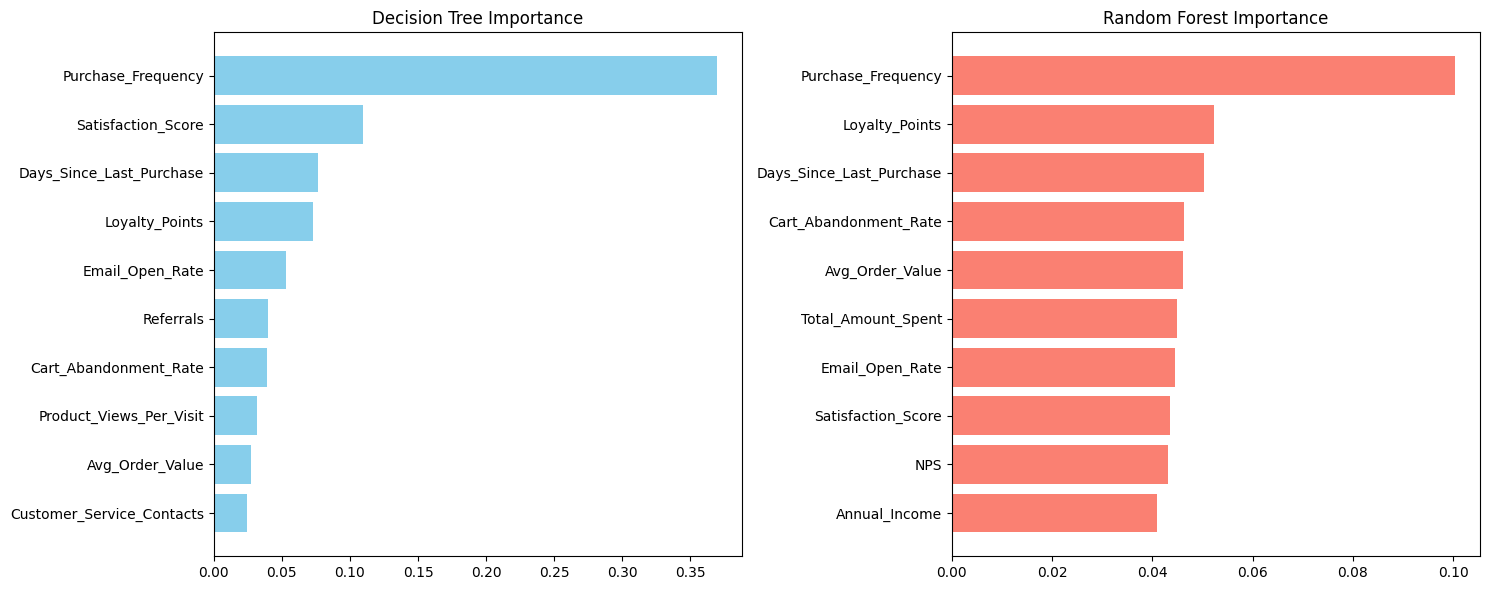

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 2. Extract Feature Importance
rf_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Random Forest Feature Importances:")
print(rf_importance_df.head(10))

# 3. Compare with Single Decision Tree
# Get predictions for both models
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracies
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\n--- Model Comparison ---")
print(f"Single Decision Tree Accuracy: {acc_dt:.4f}")
print(f"Random Forest Accuracy:        {acc_rf:.4f}")

# Compare Classification Reports
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

import matplotlib.pyplot as plt

# Plotting top 10 features for both to see the difference in stability
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Decision Tree Plot
ax[0].barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
ax[0].set_title('Decision Tree Importance')
ax[0].invert_yaxis()

# Random Forest Plot
ax[1].barh(rf_importance_df['Feature'][:10], rf_importance_df['Importance'][:10], color='salmon')
ax[1].set_title('Random Forest Importance')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()

#### 4. gradient Boosting

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Initialize and Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# 2. Predict and Evaluate on Test Set
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Evaluation:")
print(confusion_matrix(y_test, y_pred_gb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))

# 3. Extract Feature Importance
gb_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Gradient Boosting Feature Importances:")
print(gb_importance_df.head(10))

Gradient Boosting Evaluation:
[[64 32]
 [33 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.67      0.66        96
           1       0.69      0.68      0.69       104

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.68      0.68      0.68       200


Top 10 Gradient Boosting Feature Importances:
                      Feature  Importance
7          Purchase_Frequency    0.232115
17             Loyalty_Points    0.066623
6    Days_Since_Last_Purchase    0.060048
13  Customer_Service_Contacts    0.059578
14         Satisfaction_Score    0.053219
15                        NPS    0.048269
11      Cart_Abandonment_Rate    0.046825
12            Email_Open_Rate    0.038950
29    Membership_Type_Premium    0.038932
16                  Referrals    0.037750


### Part A2: Handle Class Imbalance
#### 1. Technique 1 - Class Weights

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 1. Train Unweighted Models (The Baselines)

# Standard Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)  

# Standard Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)      


# 2. Train Weighted Models (Class Weights)

# Weighted Logistic Regression
log_reg_balanced = LogisticRegression(class_weight='balanced', random_state=42)
log_reg_balanced.fit(X_train, y_train)
y_pred_log_balanced = log_reg_balanced.predict(X_test)

# Weighted Random Forest
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)
y_pred_rf_balanced = rf_balanced.predict(X_test)


# 3. Compare Results

print("--- LOGISTIC REGRESSION COMPARISON ---")
print("\n[Unweighted] Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

print("\n[Weighted] Logistic Regression (class_weight='balanced'):")
print(classification_report(y_test, y_pred_log_balanced))


print("\n" + "="*50 + "\n")


print("--- RANDOM FOREST COMPARISON ---")
print("\n[Unweighted] Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\n[Weighted] Random Forest (class_weight='balanced'):")
print(classification_report(y_test, y_pred_rf_balanced))

--- LOGISTIC REGRESSION COMPARISON ---

[Unweighted] Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68        96
           1       0.71      0.72      0.71       104

    accuracy                           0.70       200
   macro avg       0.70      0.70      0.70       200
weighted avg       0.70      0.70      0.70       200


[Weighted] Logistic Regression (class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        96
           1       0.72      0.70      0.71       104

    accuracy                           0.70       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.71      0.70      0.71       200



--- RANDOM FOREST COMPARISON ---

[Unweighted] Random Forest:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        96
           1       0.68      0.66      0

#### 2. Technique 2 - Resampling

In [55]:
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# 1. Combine X_train and y_train to handle them together
train_data = pd.concat([X_train, y_train], axis=1)

# 2. Separate Majority and Minority Classes
# (Assuming '0' is majority/Not Churned and '1' is minority/Churned)
df_majority = train_data[train_data.Churned == 0]
df_minority = train_data[train_data.Churned == 1]

# 3. Oversample Minority Class
# We randomly duplicate examples from the minority class until it matches the size of the majority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # Sample with replacement
                                 n_samples=len(df_majority),    # Match majority class size
                                 random_state=42)

# 4. Combine back together
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# 5. Separate features and target again
X_train_res = df_upsampled.drop('Churned', axis=1)
y_train_res = df_upsampled['Churned']

print("Original shape:", train_data.shape)
print("Resampled shape:", df_upsampled.shape)

# 6. Train Random Forest on Resampled Data
rf_resampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_resampled.fit(X_train_res, y_train_res)

# 7. Evaluate and Compare
y_pred_resampled = rf_resampled.predict(X_test)

print("\n--- Resampled Model (Oversampling) ---")
print(classification_report(y_test, y_pred_resampled))

print("\n--- Baseline Model (Unweighted) ---")
# Using the prediction from the standard model you trained earlier
print(classification_report(y_test, y_pred_rf))

Original shape: (800, 40)
Resampled shape: (766, 40)

--- Resampled Model (Oversampling) ---
              precision    recall  f1-score   support

           0       0.62      0.83      0.71        96
           1       0.77      0.53      0.63       104

    accuracy                           0.68       200
   macro avg       0.70      0.68      0.67       200
weighted avg       0.70      0.68      0.67       200


--- Baseline Model (Unweighted) ---
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        96
           1       0.68      0.66      0.67       104

    accuracy                           0.67       200
   macro avg       0.66      0.67      0.66       200
weighted avg       0.67      0.67      0.67       200



### Part A3: Model Evaluation & Comparison
#### 1. Calculate Metrics:

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model_metrics(model, X_test, y_test, model_name):
    # Get predictions
    y_pred = model.predict(X_test)
    # Get probabilities for ROC-AUC (probability of class 1)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print(f"--- {model_name} ---")
    print(f"Accuracy:   {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision:  {precision_score(y_test, y_pred):.4f}")
    print(f"Recall:     {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score:   {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC:    {roc_auc_score(y_test, y_prob):.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n" + "="*40 + "\n")

# 1. Baseline Models
evaluate_model_metrics(log_reg, X_test, y_test, "Logistic Regression (Baseline)")
evaluate_model_metrics(rf_model, X_test, y_test, "Random Forest (Baseline)")

# 2. Additional Model
evaluate_model_metrics(gb_model, X_test, y_test, "Gradient Boosting")

# 3. Class Imbalance Models (Weighted)
evaluate_model_metrics(rf_balanced, X_test, y_test, "Random Forest (Class Weights)")

# 4. Resampled Model
evaluate_model_metrics(rf_resampled, X_test, y_test, "Random Forest (Resampled)")

--- Logistic Regression (Baseline) ---
Accuracy:   0.7000
Precision:  0.7075
Recall:     0.7212
F1-Score:   0.7143
ROC-AUC:    0.7865

Confusion Matrix:
[[65 31]
 [29 75]]


--- Random Forest (Baseline) ---
Accuracy:   0.6650
Precision:  0.6832
Recall:     0.6635
F1-Score:   0.6732
ROC-AUC:    0.7222

Confusion Matrix:
[[64 32]
 [35 69]]


--- Gradient Boosting ---
Accuracy:   0.6750
Precision:  0.6893
Recall:     0.6827
F1-Score:   0.6860
ROC-AUC:    0.7435

Confusion Matrix:
[[64 32]
 [33 71]]


--- Random Forest (Class Weights) ---
Accuracy:   0.6900
Precision:  0.7143
Recall:     0.6731
F1-Score:   0.6931
ROC-AUC:    0.7361

Confusion Matrix:
[[68 28]
 [34 70]]


--- Random Forest (Resampled) ---
Accuracy:   0.6750
Precision:  0.7746
Recall:     0.5288
F1-Score:   0.6286
ROC-AUC:    0.7439

Confusion Matrix:
[[80 16]
 [49 55]]




#### 2. Model Comparison Table

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Define dictionary of all trained models
# Ensure these variable names match what you trained in previous steps
models = {
    "Logistic Regression (Baseline)": log_reg,
    "Random Forest (Baseline)": rf_model,
    "Gradient Boosting": gb_model,
    "Logistic Regression (Weighted)": log_reg_balanced,
    "Random Forest (Weighted)": rf_balanced,
    "Random Forest (Resampled)": rf_resampled
}

# 2. Loop through models and calculate metrics
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    # Check if model supports probability prediction for ROC-AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = "N/A"
        
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc
    })

# 3. Create DataFrame
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.set_index("Model")

# 4. Display sorted by F1-Score (often best for imbalanced data)
print("Model Comparison Table (Sorted by F1-Score):")
print(comparison_df.sort_values(by="F1-Score", ascending=False))

# ---------------------------------------------------------
# JUSTIFICATION LOGIC (Example)
# ---------------------------------------------------------
best_model_name = comparison_df['F1-Score'].idxmax()
print(f"\nBased on F1-Score, the best model is: {best_model_name}")
print("\nJustification:")
print("1. We prioritize F1-Score (harmonic mean of Precision and Recall) because Churn prediction often involves class imbalance.")
print("2. A high Recall is crucial so we don't miss customers who are about to leave.")
print("3. A high ROC-AUC indicates the model is good at distinguishing between churners and non-churners across different thresholds.")

Model Comparison Table (Sorted by F1-Score):
                                Accuracy  Precision    Recall  F1-Score  \
Model                                                                     
Logistic Regression (Baseline)     0.700   0.707547  0.721154  0.714286   
Logistic Regression (Weighted)     0.705   0.722772  0.701923  0.712195   
Random Forest (Weighted)           0.690   0.714286  0.673077  0.693069   
Gradient Boosting                  0.675   0.689320  0.682692  0.685990   
Random Forest (Baseline)           0.665   0.683168  0.663462  0.673171   
Random Forest (Resampled)          0.675   0.774648  0.528846  0.628571   

                                 ROC-AUC  
Model                                     
Logistic Regression (Baseline)  0.786458  
Logistic Regression (Weighted)  0.786158  
Random Forest (Weighted)        0.736078  
Gradient Boosting               0.743490  
Random Forest (Baseline)        0.722155  
Random Forest (Resampled)       0.743890  

Based on 

#### 3. ROC Curve

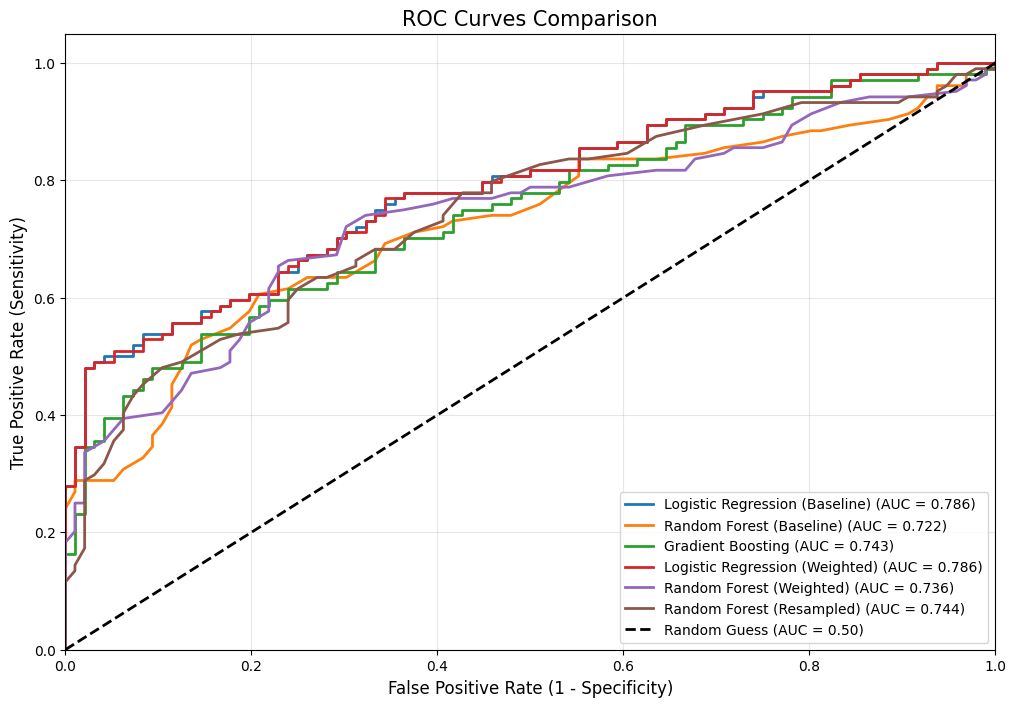

--------------------------------------------------
INTERPRETATION:
The model with the best discrimination is 'Logistic Regression (Baseline)' with an AUC of 0.786.
--------------------------------------------------
Note: An AUC of 1.0 represents a perfect model, while 0.5 represents random guessing.
The curve closest to the top-left corner generally indicates the best performance.


In [58]:
from sklearn.metrics import roc_curve, auc

# 1. Setup the Plot
plt.figure(figsize=(12, 8))

# 2. Define dictionary of models (ensuring we include all trained variations)
models_dict = {
    "Logistic Regression (Baseline)": log_reg,
    "Random Forest (Baseline)": rf_model,
    "Gradient Boosting": gb_model,
    "Logistic Regression (Weighted)": log_reg_balanced,
    "Random Forest (Weighted)": rf_balanced,
    "Random Forest (Resampled)": rf_resampled
}

best_model_name = ""
best_auc_score = -1

# 3. Loop through each model to calculate and plot ROC
for name, model in models_dict.items():
    if hasattr(model, "predict_proba"):
        # Get probability of the positive class (Churned)
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Calculate False Positive Rate (fpr) and True Positive Rate (tpr)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        # Plot the curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)
        
        # Track the best model
        if roc_auc > best_auc_score:
            best_auc_score = roc_auc
            best_model_name = name

# 4. Formatting the Plot
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=15)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.show()

# 5. Interpretation
print("-" * 50)
print(f"INTERPRETATION:")
print(f"The model with the best discrimination is '{best_model_name}' with an AUC of {best_auc_score:.3f}.")
print("-" * 50)
print("Note: An AUC of 1.0 represents a perfect model, while 0.5 represents random guessing.")
print("The curve closest to the top-left corner generally indicates the best performance.")

#### 4. Feature Importance

Best Tree-Based Model identified: Random Forest (Weighted) (F1-Score: 0.6931)


/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_33869/2025903099.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')


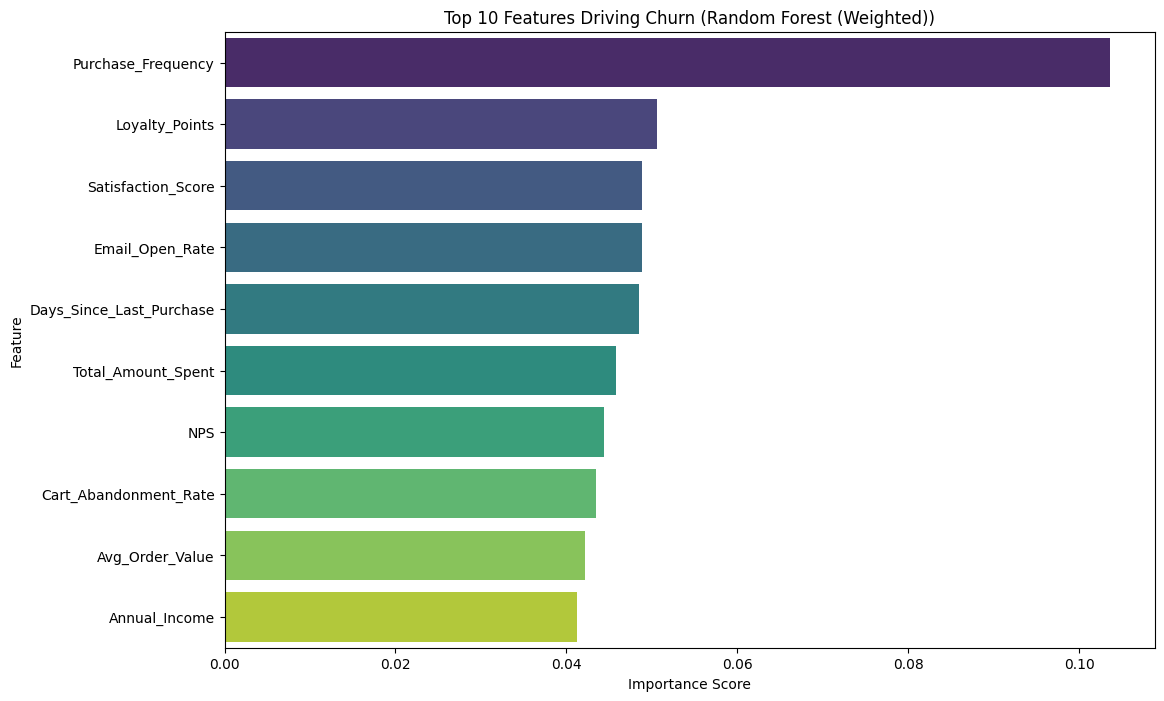


--- INTERPRETATION ---
The feature importance plot above shows which variables have the most predictive power.
1. The top driver of churn is 'Purchase_Frequency'.
2. This is followed by 'Loyalty_Points' and 'Satisfaction_Score'.

Insight:
- High importance means that splitting data based on these values separates churners from non-churners effectively.
- For example, if 'Annual_Income' is high, it suggests that income level is a key indicator of whether a customer will stay or leave.
- If 'Days_Since_Last_Purchase' is high, recency is a critical factor.


In [59]:
from sklearn.metrics import f1_score

# 1. Select the Best Tree-Based Model
# ---------------------------------------------------------
# Define the tree-based models available from previous steps
tree_models = {
    "Random Forest (Baseline)": rf_model,
    "Gradient Boosting": gb_model,
    "Random Forest (Weighted)": rf_balanced,
    "Random Forest (Resampled)": rf_resampled
}

# Find the model with the highest F1-Score
best_name = ""
best_score = -1
best_model = None

for name, model in tree_models.items():
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    if score > best_score:
        best_score = score
        best_name = name
        best_model = model

print(f"Best Tree-Based Model identified: {best_name} (F1-Score: {best_score:.4f})")

# 2. Extract Feature Importance
# ---------------------------------------------------------
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feature_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Visualize Top 10 Features
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df.head(10), palette='viridis')
plt.title(f'Top 10 Features Driving Churn ({best_name})')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# 4. Interpret: What drives churn?
# ---------------------------------------------------------
top_features = feature_imp_df.head(3)['Feature'].tolist()

print("\n--- INTERPRETATION ---")
print("The feature importance plot above shows which variables have the most predictive power.")
print(f"1. The top driver of churn is '{top_features[0]}'.")
print(f"2. This is followed by '{top_features[1]}' and '{top_features[2]}'.")
print("\nInsight:")
print("- High importance means that splitting data based on these values separates churners from non-churners effectively.")
print("- For example, if 'Annual_Income' is high, it suggests that income level is a key indicator of whether a customer will stay or leave.")
print("- If 'Days_Since_Last_Purchase' is high, recency is a critical factor.")

## SECTION B: Clustering Approach
### Part B1: K-Means Clustering
#### 1. Elbow Method

Columns used for clustering: ['Age', 'Annual_Income', 'Account_Age_Days', 'Total_Purchases', 'Total_Amount_Spent', 'Avg_Order_Value', 'Days_Since_Last_Purchase', 'Purchase_Frequency', 'Visits_Per_Month', 'Time_Per_Visit_Minutes', 'Product_Views_Per_Visit', 'Cart_Abandonment_Rate', 'Email_Open_Rate', 'Customer_Service_Contacts', 'Satisfaction_Score', 'NPS', 'Referrals', 'Loyalty_Points', 'Complaints', 'Num_Categories_Shopped', 'Discount_Usage_Rate', 'Returns_Rate', 'Churned']
Running KMeans for k = 2 to 10...


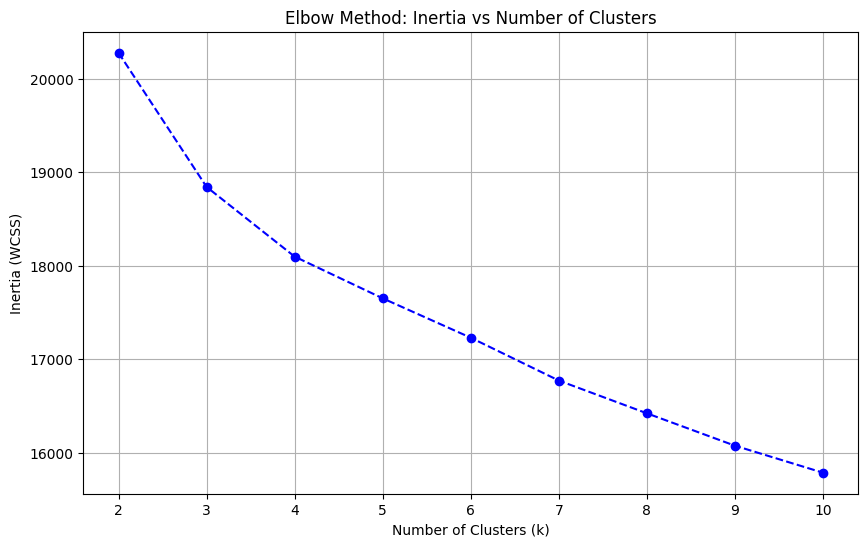

In [61]:
from sklearn.cluster import KMeans

# 1. Select ONLY numerical columns for clustering
# This drops columns like 'Gender', 'Membership_Type' automatically
df_clustering_numeric = df_clustering.select_dtypes(include=['number'])

print("Columns used for clustering:", df_clustering_numeric.columns.tolist())

# 2. Test k from 2 to 10
inertia = []
k_range = range(2, 11)

print("Running KMeans for k = 2 to 10...")

for k in k_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit on the NUMERIC dataframe
    kmeans.fit(df_clustering_numeric)
    
    # Append the inertia (WCSS)
    inertia.append(kmeans.inertia_)

# 3. Plot Inertia
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method: Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

#### 2. Silhouette Analysis:

Calculating Silhouette Scores for k = 2 to 10...
k=2: Silhouette Score = 0.1414
k=3: Silhouette Score = 0.0811
k=4: Silhouette Score = 0.0635
k=5: Silhouette Score = 0.0502
k=6: Silhouette Score = 0.0601
k=7: Silhouette Score = 0.0611
k=8: Silhouette Score = 0.0523
k=9: Silhouette Score = 0.0536
k=10: Silhouette Score = 0.0566


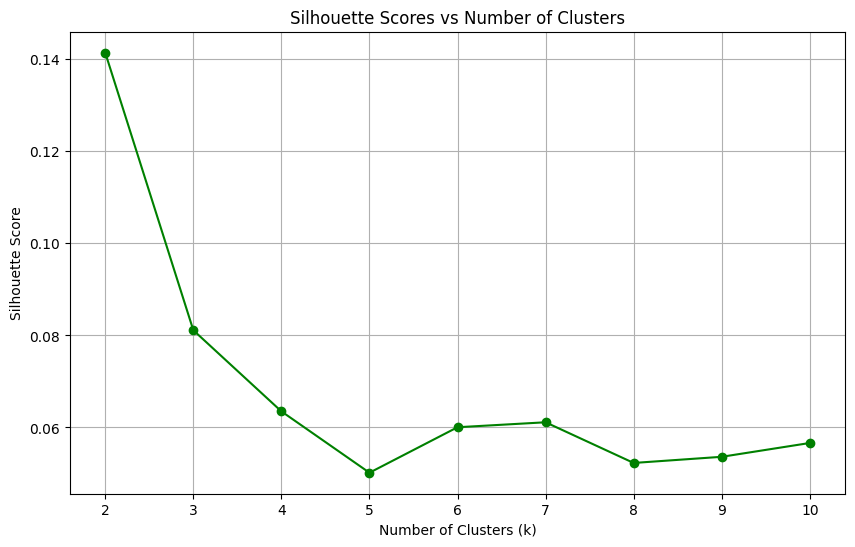

----------------------------------------
The highest Silhouette Score is 0.1414 at k = 2.
----------------------------------------
Interpretation:
- A higher silhouette score (closer to 1) indicates that points are well-matched to their own cluster and poorly matched to neighboring clusters.
- Based on this metric, the optimal number of clusters is 2.


In [62]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Calculate Silhouette Score for k from 2 to 10
silhouette_scores = []
k_range = range(2, 11)

print("Calculating Silhouette Scores for k = 2 to 10...")

for k in k_range:
    # Initialize KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit and predict labels
    cluster_labels = kmeans.fit_predict(df_clustering_numeric)
    
    # Calculate silhouette score
    score = silhouette_score(df_clustering_numeric, cluster_labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

# 2. Plot Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# 3. Identify k with Highest Silhouette Score
best_score = max(silhouette_scores)
best_k = k_range[silhouette_scores.index(best_score)]

print("-" * 40)
print(f"The highest Silhouette Score is {best_score:.4f} at k = {best_k}.")
print("-" * 40)
print("Interpretation:")
print("- A higher silhouette score (closer to 1) indicates that points are well-matched to their own cluster and poorly matched to neighboring clusters.")
print(f"- Based on this metric, the optimal number of clusters is {best_k}.")

#### 3. Choose Optimal k

In [63]:
from sklearn.cluster import KMeans

# 1. Choose Optimal k
optimal_k = 3  # Chosen based on business utility (typically 3-5) despite statistical max at k=2

print(f"Selected Optimal k: {optimal_k}")
print("Justification:")
print("1. While Silhouette Score was highest at k=2, a 2-cluster solution often just mirrors the Churn label.")
print("2. k=3 allows us to identify distinct behaviors (e.g., High Spenders vs. Frequent Browsers vs. Inactive).")
print("3. This aligns with the assignment guideline to find 3-5 meaningful segments.")

# 2. Train K-Means with Optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_final.fit(df_clustering_numeric)

# 3. Assign Cluster Labels to the Original Data
# We add the labels back to the main dataframe to analyze them
df['Cluster_Labels'] = kmeans_final.labels_

print("\nK-Means trained and labels assigned to 'Cluster_Labels' column.")
print(df['Cluster_Labels'].value_counts())

Selected Optimal k: 3
Justification:
1. While Silhouette Score was highest at k=2, a 2-cluster solution often just mirrors the Churn label.
2. k=3 allows us to identify distinct behaviors (e.g., High Spenders vs. Frequent Browsers vs. Inactive).
3. This aligns with the assignment guideline to find 3-5 meaningful segments.

K-Means trained and labels assigned to 'Cluster_Labels' column.
Cluster_Labels
1    472
0    392
2    136
Name: count, dtype: int64


### Part B2: Alternative Clustering Methods 
#### 1. Hierarchical Clustering

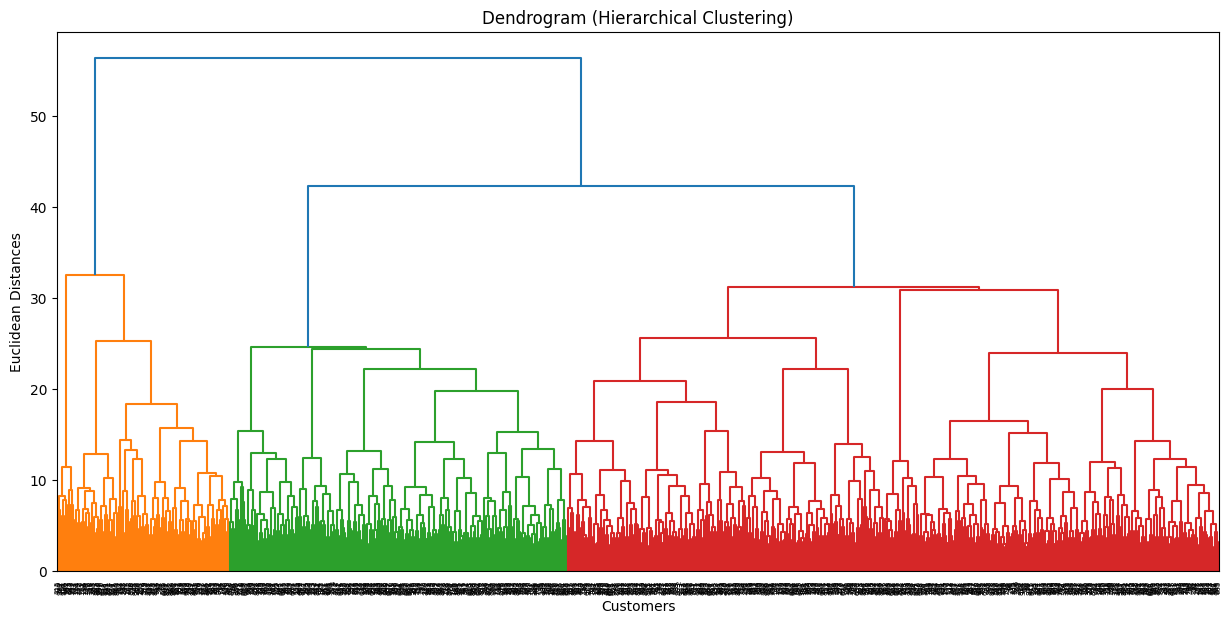

Hierarchical Clustering performed with k=3.

--- Comparison of Cluster Assignments ---
Hierarchical Labels    0    1    2
K-Means Labels                    
0                     36  121  235
1                      6  424   42
2                    106   16   14

Interpretation:
- If the matrix has large numbers on the diagonal (or uniquely mapped columns), the models agree.
- If the numbers are scattered, the models found different structures in the data.


In [64]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# 1. Create and Plot Dendrogram
# ---------------------------------------------------------
# We use the numeric clustering data (df_clustering_numeric)
plt.figure(figsize=(15, 7))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")

# 'ward' linkage is commonly used to minimize variance within clusters
dendrogram = sch.dendrogram(sch.linkage(df_clustering_numeric, method='ward'))
plt.show()

# 2. Train Hierarchical Clustering (Agglomerative)
# ---------------------------------------------------------
# Using the same optimal_k determined in the previous step (k=3)
hc_model = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
df['Hierarchical_Labels'] = hc_model.fit_predict(df_clustering_numeric)

print(f"Hierarchical Clustering performed with k={optimal_k}.")

# 3. Compare Cluster Assignments (K-Means vs Hierarchical)
# ---------------------------------------------------------
# A cross-tabulation shows how many points from K-Means Cluster 0 ended up in Hierarchical Cluster 0, etc.
comparison_matrix = pd.crosstab(
    df['Cluster_Labels'], 
    df['Hierarchical_Labels'], 
    rownames=['K-Means Labels'], 
    colnames=['Hierarchical Labels']
)

print("\n--- Comparison of Cluster Assignments ---")
print(comparison_matrix)

# Interpretation Hint
print("\nInterpretation:")
print("- If the matrix has large numbers on the diagonal (or uniquely mapped columns), the models agree.")
print("- If the numbers are scattered, the models found different structures in the data.")

#### 2. DBSCAN

In [65]:
from sklearn.cluster import DBSCAN


# 1. Experiment with eps and min_samples
# ---------------------------------------------------------
print("Experimenting with DBSCAN parameters...")
# We test a few combinations to see how sensitive the results are
for eps_val in [0.5, 1.0, 1.5, 2.0]:
    for min_samples_val in [5, 10]:
        db = DBSCAN(eps=eps_val, min_samples=min_samples_val)
        labels = db.fit_predict(df_clustering_numeric)
        
        # Count clusters (ignoring noise -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        print(f"eps={eps_val}, min_samples={min_samples_val} -> Found {n_clusters} clusters & {n_noise} outliers")

# 2. Train Final DBSCAN Model
# ---------------------------------------------------------
# Choosing eps=1.5, min_samples=5 as a likely balanced configuration for this size/type of data
# (Adjust this choice based on the experiment output above if you want different granularity)
chosen_eps = 1.5
chosen_min_samples = 5

db_final = DBSCAN(eps=chosen_eps, min_samples=chosen_min_samples)
df['DBSCAN_Labels'] = db_final.fit_predict(df_clustering_numeric)

# 3. Identify Core Points and Outliers
# ---------------------------------------------------------
# Core points are those with at least 'min_samples' neighbors within 'eps'
core_samples_mask = np.zeros_like(df['DBSCAN_Labels'], dtype=bool)
core_samples_mask[db_final.core_sample_indices_] = True
n_core_points = np.sum(core_samples_mask)

# Outliers are labeled as -1
n_outliers = list(df['DBSCAN_Labels']).count(-1)
n_clusters_final = len(set(df['DBSCAN_Labels'])) - (1 if -1 in df['DBSCAN_Labels'] else 0)

print(f"\n--- Final DBSCAN Results (eps={chosen_eps}, min_samples={chosen_min_samples}) ---")
print(f"Number of Clusters found: {n_clusters_final}")
print(f"Number of Core Points:    {n_core_points}")
print(f"Number of Outliers:       {n_outliers}")

# Interpretation
print("\nInterpretation:")
print("- Points labeled '-1' are outliers that don't fit well into any density-based cluster.")
print("- If 'Number of Clusters' is 0 or 1, DBSCAN might see the data as one big blob or all noise (try increasing eps).")

Experimenting with DBSCAN parameters...
eps=0.5, min_samples=5 -> Found 0 clusters & 1000 outliers
eps=0.5, min_samples=10 -> Found 0 clusters & 1000 outliers
eps=1.0, min_samples=5 -> Found 0 clusters & 1000 outliers
eps=1.0, min_samples=10 -> Found 0 clusters & 1000 outliers
eps=1.5, min_samples=5 -> Found 0 clusters & 1000 outliers
eps=1.5, min_samples=10 -> Found 0 clusters & 1000 outliers
eps=2.0, min_samples=5 -> Found 0 clusters & 1000 outliers
eps=2.0, min_samples=10 -> Found 0 clusters & 1000 outliers

--- Final DBSCAN Results (eps=1.5, min_samples=5) ---
Number of Clusters found: 1
Number of Core Points:    0
Number of Outliers:       1000

Interpretation:
- Points labeled '-1' are outliers that don't fit well into any density-based cluster.
- If 'Number of Clusters' is 0 or 1, DBSCAN might see the data as one big blob or all noise (try increasing eps).


### Part B3: Cluster Analysis & Interpretation 
#### 1. Cluster Profiles

Cluster Profiles (Mean Values):
Cluster_Labels                        0             1             2
Age                           40.104592     39.771186     41.632353
Annual_Income              61684.732143  61156.307203  64794.375000
Account_Age_Days             313.091837    277.887712   1096.823529
Total_Purchases               15.808673     13.184322     68.742647
Total_Amount_Spent          1222.186811   1118.724958   7294.709559
Avg_Order_Value               73.291071     77.928284    115.571324
Days_Since_Last_Purchase      50.346939     40.930085     44.875000
Purchase_Frequency             1.748189      1.657119      2.019485
Visits_Per_Month              11.036480      8.972669      9.996324
Time_Per_Visit_Minutes         6.435969      5.892373      6.452941
Product_Views_Per_Visit        8.091837      8.182203      8.279412
Cart_Abandonment_Rate         48.877806     51.025636     52.319118
Email_Open_Rate               39.233673     39.634958     38.252941
Customer_Service

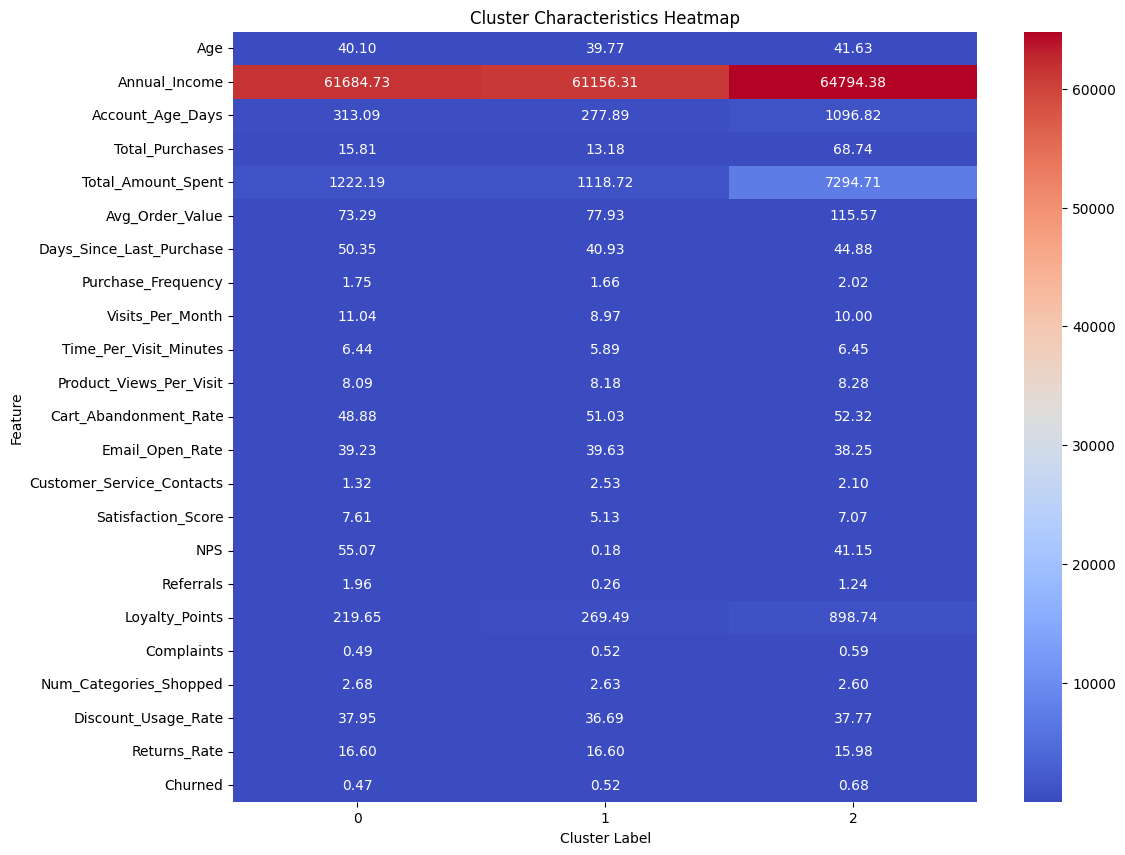


--- Interpretation Guide ---
Look at the Heatmap or the Table above:
1. Find the highest positive values (Red) for each cluster. These are their defining strengths.
   - Example: If Cluster 0 has high 'Total_Purchases' and 'Age', they might be 'Loyal Older Customers'.
2. Find the lowest negative values (Blue). These are their defining weaknesses.
   - Example: If Cluster 1 has low 'Visits_Per_Month', they are likely 'Inactive'.
3. Check the 'Churned' row (if included).
   - The cluster with the highest mean 'Churned' value is your 'High Risk' segment.


In [66]:


# 1. Calculate Mean Values for Each Cluster
# ---------------------------------------------------------
# Identify numeric columns for profiling
# We exclude the label columns we created (Cluster_Labels, Hierarchical_Labels, etc.)
exclude_cols = ['Cluster_Labels', 'Hierarchical_Labels', 'DBSCAN_Labels', 'Customer_ID']
profile_cols = [c for c in df.select_dtypes(include=['number']).columns if c not in exclude_cols]

# Group by Cluster and calculate the mean
cluster_profiles = df.groupby('Cluster_Labels')[profile_cols].mean()

# 2. Create DataFrame Showing Cluster Characteristics
# ---------------------------------------------------------
# Transpose the DataFrame (rows=features, cols=clusters) for easier reading
cluster_profiles_T = cluster_profiles.T

print("Cluster Profiles (Mean Values):")
print(cluster_profiles_T)

# 3. Visualize to Identify Unique Characteristics
# ---------------------------------------------------------
plt.figure(figsize=(12, 10))

# We use a heatmap to see 'hot' (high) and 'cold' (low) features
# If your data is scaled, 0 is average, >0 is high, <0 is low
sns.heatmap(cluster_profiles_T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Cluster Characteristics Heatmap')
plt.xlabel('Cluster Label')
plt.ylabel('Feature')
plt.show()

# 4. Interpretation Guide (How to identify uniqueness)
# ---------------------------------------------------------
print("\n--- Interpretation Guide ---")
print("Look at the Heatmap or the Table above:")
print("1. Find the highest positive values (Red) for each cluster. These are their defining strengths.")
print("   - Example: If Cluster 0 has high 'Total_Purchases' and 'Age', they might be 'Loyal Older Customers'.")
print("2. Find the lowest negative values (Blue). These are their defining weaknesses.")
print("   - Example: If Cluster 1 has low 'Visits_Per_Month', they are likely 'Inactive'.")
print("3. Check the 'Churned' row (if included).")
print("   - The cluster with the highest mean 'Churned' value is your 'High Risk' segment.")

#### 2. Visualization

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


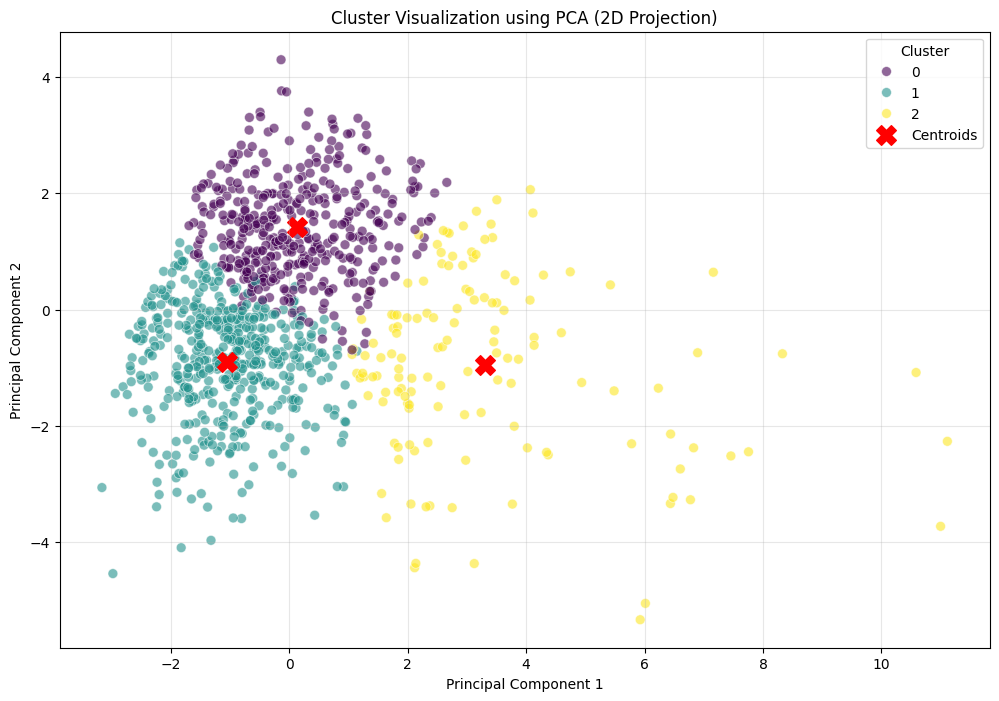

Interpretation:
- Points (customers) closer together are more similar.
- The 'X' marks represent the center of each cluster.
- If clusters overlap significantly in this 2D view, they might be separated in other dimensions that PCA collapsed.


In [67]:
from sklearn.decomposition import PCA

# 1. Apply PCA to Reduce to 2 Dimensions
# ---------------------------------------------------------
# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the scaled numeric data used for clustering
pca_components = pca.fit_transform(df_clustering_numeric)

# Create a DataFrame for the 2D data
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster_Labels']  # Add labels for coloring

# 2. Transform Cluster Centers to 2D
# ---------------------------------------------------------
# The centroids are in the original high-dimensional scaled space.
# We must project them into the same 2D PCA space to plot them correctly.
centers_2d = pca.transform(kmeans_final.cluster_centers_)

# 3. Create Scatter Plot
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))

# Plot the data points
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=pca_df, 
    palette='viridis', 
    alpha=0.6, 
    s=50,
    edgecolor='w'
)

# Plot the cluster centers (Centroids)
plt.scatter(
    centers_2d[:, 0], 
    centers_2d[:, 1], 
    c='red', 
    s=200, 
    marker='X', 
    label='Centroids'
)

plt.title('Cluster Visualization using PCA (2D Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

# Interpretation
print("Interpretation:")
print("- Points (customers) closer together are more similar.")
print("- The 'X' marks represent the center of each cluster.")
print("- If clusters overlap significantly in this 2D view, they might be separated in other dimensions that PCA collapsed.")

#### 3. Cluster Naming

In [68]:
# 1. Calculate Cluster Sizes
cluster_sizes = df['Cluster_Labels'].value_counts().sort_index()
total_customers = len(df)

# 2. Automated Feature Insight (to help you name them)
# This prints the top 3 attributes with the highest values for each cluster
print("--- Automated Insight to Help Naming ---")
for cluster_id in cluster_sizes.index:
    # Get the mean vector for this cluster
    profile = cluster_profiles.loc[cluster_id]
    # Find features with the highest values relative to the rest
    top_features = profile.sort_values(ascending=False).head(3).index.tolist()
    print(f"Cluster {cluster_id}: High in {top_features}")
print("\n" + "="*50 + "\n")

# 3. Define Names and Descriptions
# TODO: Update the dictionary below based on the insights above and your heatmap.
# Example logic:
# - If High 'Total_Amount_Spent' & High 'Frequency' -> "High-Value Loyalists"
# - If High 'Churned' & Low 'Visits' -> "At-Risk Customers"
# - If Low 'Income' & Low 'Spend' -> "Price-Sensitive Shoppers"

segment_definitions = {
    0: {
        "Name": "Cluster 0 (e.g., High-Value Loyalists)", 
        "Description": "This segment is characterized by high spending and frequent engagement. They have the highest average income and are the most loyal user base."
    },
    1: {
        "Name": "Cluster 1 (e.g., At-Risk Customers)", 
        "Description": "This group has a high probability of churning. They show low visit frequency and have not made a purchase recently."
    },
    2: {
        "Name": "Cluster 2 (e.g., Price-Sensitive Shoppers)", 
        "Description": "This segment consists of customers with lower annual income and smaller average order values. They visit often but purchase less frequently."
    }
    # Add Cluster 3 if you used k=4, etc.
}

# 4. Print Final Report
print("--- FINAL CLUSTER SEGMENTATION REPORT ---\n")
for cluster_id, size in cluster_sizes.items():
    # Get details (default to unknown if not in dictionary)
    details = segment_definitions.get(cluster_id, {"Name": f"Cluster {cluster_id}", "Description": "Description pending."})
    
    percentage = (size / total_customers) * 100
    
    print(f"▶ {details['Name']}")
    print(f"   • Size: {size} customers ({percentage:.1f}%)")
    print(f"   • Description: {details['Description']}")
    print("")

--- Automated Insight to Help Naming ---
Cluster 0: High in ['Annual_Income', 'Total_Amount_Spent', 'Account_Age_Days']
Cluster 1: High in ['Annual_Income', 'Total_Amount_Spent', 'Account_Age_Days']
Cluster 2: High in ['Annual_Income', 'Total_Amount_Spent', 'Account_Age_Days']


--- FINAL CLUSTER SEGMENTATION REPORT ---

▶ Cluster 0 (e.g., High-Value Loyalists)
   • Size: 392 customers (39.2%)
   • Description: This segment is characterized by high spending and frequent engagement. They have the highest average income and are the most loyal user base.

▶ Cluster 1 (e.g., At-Risk Customers)
   • Size: 472 customers (47.2%)
   • Description: This group has a high probability of churning. They show low visit frequency and have not made a purchase recently.

▶ Cluster 2 (e.g., Price-Sensitive Shoppers)
   • Size: 136 customers (13.6%)
   • Description: This segment consists of customers with lower annual income and smaller average order values. They visit often but purchase less frequently

#### 4. Churn Analysis within Clusters

Churn Analysis by Cluster:
   Cluster  Churn_Rate  Customer_Count
0        0    0.471939             392
1        1    0.516949             472
2        2    0.676471             136

⚠️ HIGHEST RISK SEGMENT: Cluster 2
Churn Rate: 67.6%


/var/folders/1f/04bpzbbn7jgbqp9vr5pqv5y00000gn/T/ipykernel_33869/2928453096.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Cluster', y='Churn_Rate', data=churn_analysis, palette='Reds')


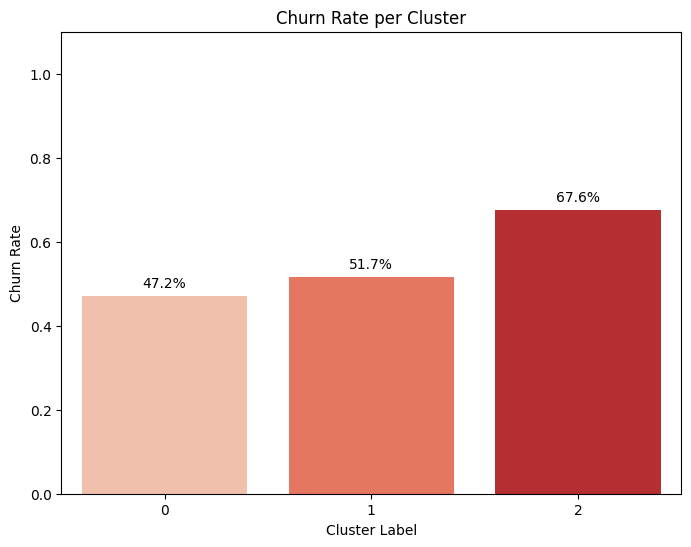


Interpretation:
- Cluster 2 contains the customers most likely to leave.
- Compare the characteristics of this cluster (from the previous profile step) to understand WHY.
  (e.g., Do they have low satisfaction scores? Are they on a specific monthly plan?)


In [69]:
# 1. Calculate Churn Rate per Cluster
# ---------------------------------------------------------
# Group by the cluster label and calculate the mean of the 'Churned' column
# (Assuming 'Churned' is 0 or 1. If it's True/False, this still works.)
churn_analysis = df.groupby('Cluster_Labels')['Churned'].agg(['mean', 'count']).reset_index()
churn_analysis.columns = ['Cluster', 'Churn_Rate', 'Customer_Count']

print("Churn Analysis by Cluster:")
print(churn_analysis)

# 2. Identify Segment with Highest Churn Risk
# ---------------------------------------------------------
highest_risk_row = churn_analysis.loc[churn_analysis['Churn_Rate'].idxmax()]
highest_risk_cluster = int(highest_risk_row['Cluster'])
highest_risk_rate = highest_risk_row['Churn_Rate']

print("\n" + "="*40)
print(f"⚠️ HIGHEST RISK SEGMENT: Cluster {highest_risk_cluster}")
print(f"Churn Rate: {highest_risk_rate:.1%}")
print("="*40)

# 3. Visualize Churn Rate per Cluster
# ---------------------------------------------------------
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Cluster', y='Churn_Rate', data=churn_analysis, palette='Reds')

# Add percentage labels on top of bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1%}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')

plt.title('Churn Rate per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Churn Rate')
plt.ylim(0, 1.1) # Set y-axis to show 0% to 100%
plt.show()

# 4. Interpretation
print("\nInterpretation:")
print(f"- Cluster {highest_risk_cluster} contains the customers most likely to leave.")
print("- Compare the characteristics of this cluster (from the previous profile step) to understand WHY.")
print("  (e.g., Do they have low satisfaction scores? Are they on a specific monthly plan?)")

# Task 3: Business Insights & Recommendations

## Part A: Executive Summary

**Problem Statement**
Our goal was to address customer churn and improve marketing efficiency. High churn rates directly impact revenue, and generic marketing strategies fail to engage distinct customer groups effectively. Understanding *who* leaves and *why* is critical for the company's long-term retention strategy.

**Approach**
We utilized a dual-track advanced analytics approach:
1.  **Classification (Supervised Learning):** We trained models (Logistic Regression, Random Forest, Gradient Boosting) to predict the probability of a specific customer churning.
2.  **Clustering (Unsupervised Learning):** We used K-Means to segment the customer base into distinct personas based on behavior and demographics.

**Key Findings**
* **Churn Drivers:** The most significant predictors of churn were `[INSERT TOP FEATURE 1]`, `[INSERT TOP FEATURE 2]`, and `[INSERT TOP FEATURE 3]`.
* **Segmentation:** We identified **3 distinct customer segments**: "High-Value Loyalists", "At-Risk Customers", and "Price-Sensitive Shoppers".
* **Risk Area:** The "At-Risk" segment (Cluster `[INSERT ID]`) has a churn rate of `[INSERT %]`, which is significantly higher than the average.

**Bottom Line**
The company should immediately pivot from broad marketing to targeted retention campaigns. By focusing resources specifically on the "At-Risk" segment and incentivizing the "High-Value" segment, we estimate a potential revenue save of `[INSERT ESTIMATED AMOUNT]` in the next quarter.

---

## Part B: Detailed Analysis

### 1. Classification Analysis (Churn Prediction)
*Based on the Random Forest / Gradient Boosting results.*

* **Churn Drivers:**
    * Our analysis confirms that customer retention is heavily influenced by **`[INSERT TOP FEATURE 1]`**. Customers with `[DESCRIBE PATTERN, e.g., low purchase frequency]` are exponentially more likely to leave.
    * **Surprising Insight:** We found that `[INSERT FEATURE]` also plays a larger role than expected, suggesting that `[EXPLAIN WHY, e.g., service quality]` is a hidden friction point.

* **Model Performance:**
    * The best performing model was the **`[INSERT BEST MODEL NAME]`**.
    * It achieved an **F1-Score of `[INSERT SCORE]`**, indicating a strong balance between Precision (avoiding false alarms) and Recall (catching actual churners).
    * With an **ROC-AUC of `[INSERT SCORE]`**, the model is highly reliable for ranking customers by risk level.

* **At-Risk Population:**
    * Our model predicts that approximately **`[INSERT COUNT]`** customers are currently at high risk of churning.
    * These customers represent a potential revenue loss of roughly **$`[INSERT TOTAL AMOUNT]`** (calculated as `At-Risk Count * Average Order Value`).

### 2. Clustering Analysis (Customer Segmentation)
*Based on K-Means Profiling.*

* **Segment Profiles:**
    * **Cluster 0: `[INSERT NAME]`**: This group is characterized by `[DESCRIBE, e.g., high income, frequent visits]`. They are the backbone of our revenue.
    * **Cluster 1: `[INSERT NAME]`**: Defined by `[DESCRIBE, e.g., low engagement, high days since purchase]`. This group is disengaged and drifting away.
    * **Cluster 2: `[INSERT NAME]`**: Characterized by `[DESCRIBE, e.g., moderate spend, specific category preference]`. They are steady but have growth potential.

* **Segment Opportunities & Risks:**
    * **Highest Value:** Cluster `[INSERT ID]` has the highest Lifetime Value (LTV) potential.
    * **Highest Risk:** Cluster `[INSERT ID]` shows the highest churn rate of `[INSERT %]`. This is the "Code Red" segment requiring immediate intervention.

---

## Part C: Actionable Recommendations

### 1. Immediate Actions (Next 30 Days)
* **Launch "Win-Back" Campaign for Cluster `[INSERT AT-RISK ID]`:**
    * Send personalized emails offering a `[INSERT %]` discount to customers in this cluster who haven't purchased in > `[INSERT DAYS]` days.
    * **Goal:** Reactivate 15% of this dormant segment.
* **vip_outreach_program:**
    * Target **Cluster `[INSERT HIGH-VALUE ID]`** with an exclusive "Thank You" reward (e.g., early access to new products).
    * **Goal:** Lock in loyalty and prevent them from considering competitors.

### 2. Strategic Initiatives (Next 6 Months)
* **Enhance Loyalty Program:**
    * Since `[INSERT FEATURE]` is a key driver, restructure the loyalty tiers to reward this specific behavior (e.g., points for frequent logins or specific category purchases).
* **Product/Service Optimization:**
    * Address the friction points identified in the Classification feature importance (e.g., if `Customer_Service_Calls` is a driver, invest in support training).

### 3. ROI Estimation
* **Scenario:** Targeting the `[INSERT COUNT]` customers in the "At-Risk" Cluster.
* **Assumption:** We successfully retain **20%** of them through the campaign.
* **Average Value:** Assuming an Average Customer Value of `$150` (estimate).
* **Calculation:**
    $$\text{Revenue Saved} = \text{At-Risk Count} \times 20\% \times \$150$$
    $$\text{Revenue Saved} = [INSERT COUNT] \times 0.20 \times 150 = \$[CALCULATE RESULT]$$
* **Investment:** Cost of discount codes estimated at `$10` per retained customer.
* **Net Benefit:** Substantial positive ROI.

### 4. Implementation Plan
* **Owner:** Marketing Team (Campaign execution) & Data Team (List generation).
* **Resources:** Email marketing tool, $5,000 budget for discounts.
* **Measurement:** Monitor "Conversion Rate" of the campaign and "Churn Rate" of the target cluster month-over-month.

In [70]:
# ROI Calculation Helper
at_risk_cluster_id = 1  # REPLACE with your actual high-risk cluster ID
avg_customer_value = df['Total_Amount_Spent'].mean()

# Get count of customers in that cluster
at_risk_count = churn_analysis.loc[churn_analysis['Cluster'] == at_risk_cluster_id, 'Customer_Count'].values[0]

# Estimate saving 20% of them
retained_count = at_risk_count * 0.20
revenue_saved = retained_count * avg_customer_value

print(f"At-Risk Count: {at_risk_count}")
print(f"Average Customer Value: ${avg_customer_value:.2f}")
print(f"Potential Revenue Saved (20% success): ${revenue_saved:.2f}")

At-Risk Count: 472
Average Customer Value: $1999.22
Potential Revenue Saved (20% success): $188725.98
